<a href="https://colab.research.google.com/github/GabrielaSch/analise-quantitativa-dissertacao/blob/main/An%C3%A1lise_quantitativa_%22Meta_Survey_posicionamentos_no_campo_da_IA%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise quantitativa "Meta Survey: posicionamentos no campo da IA"

Análise estatística dos resultados do Survey "Meta-Survey: posicionamentos no campo da IA" (https://docs.google.com/forms/d1BvgX7urPma8V2oTi580gp9iebyoW5lgRbjLNVOspfIc/edit), que compõe o material empírico da dissertação "Título", apresentada ao Programa de Pós-Graduação em Sociologia do Departamento de Sociologia da Faculdade de Filosofia, Letras e Ciências Humanas da Universidade de São Paulo.

# Exploratory data analysis

In [1]:
# Bibliotecas necessárias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr

In [2]:
# Importação do arquivo de respostas ao questionário

df = pd.read_csv("sample_data/Respostas Metasurvey_posicionamentos no campo da IA.csv",
                                           encoding = 'utf-8')

df.head()

,Carimbo de data/hora,Qual é o seu gênero?,Qual é a sua cor ou raça/etnia?,Qual é a sua faixa etária?,Em que estado você mora atualmente?,Qual é a sua ocupação atual?,Você aplica conhecimentos técnicos da área de Inteligência Artificial na sua atuação:,1. Existem até o momento mais dissensos do que consensos sobre quais são os principais problemas a serem enfrentados pelo campo da IA.,2. As Big Techs têm mais poder do que deveriam em definir as possibilidades e limites do campo da IA.,3. O foco atual do campo da IA na abordagem data and compute-intensive é acertado.,...,"8. De modo geral, o desenvolvimento científico da IA terá um impacto futuro positivo no mundo.","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [1. Existem até o momento mais dissensos do que consensos sobre quais são os principais problemas a serem enfrentados pelo campo da IA.]","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [2. As Big Techs têm mais poder do que deveriam em definir as possibilidades e limites do campo da IA.]","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [3. O foco atual do campo da IA na abordagem data and compute-intensive é acertado.]","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [4. No contexto da pesquisa em IA, considerações éticas e progresso científico podem entrar em conflito.]","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [5. Outros setores não-especialistas, como o poder público e a sociedade civil, devem ter participação nas definições éticas do campo da IA.]","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrant

In [3]:
# Estatística descritiva do dataframe

df.describe()

,Carimbo de data/hora,Qual é o seu gênero?,Qual é a sua cor ou raça/etnia?,Qual é a sua faixa etária?,Em que estado você mora atualmente?,Qual é a sua ocupação atual?,Você aplica conhecimentos técnicos da área de Inteligência Artificial na sua atuação:,1. Existem até o momento mais dissensos do que consensos sobre quais são os principais problemas a serem enfrentados pelo campo da IA.,2. As Big Techs têm mais poder do que deveriam em definir as possibilidades e limites do campo da IA.,3. O foco atual do campo da IA na abordagem data and compute-intensive é acertado.,...,"8. De modo geral, o desenvolvimento científico da IA terá um impacto futuro positivo no mundo.","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [1. Existem até o momento mais dissensos do que consensos sobre quais são os principais problemas a serem enfrentados pelo campo da IA.]","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [2. As Big Techs têm mais poder do que deveriam em definir as possibilidades e limites do campo da IA.]","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [3. O foco atual do campo da IA na abordagem data and compute-intensive é acertado.]","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [4. No contexto da pesquisa em IA, considerações éticas e progresso científico podem entrar em conflito.]","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [5. Outros setores não-especialistas, como o poder público e a sociedade civil, devem ter participação nas definições éticas do campo da IA.]","Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar ""concordo totalmente"" ou ""concordo mais do que discordo"" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrant

## Transformações dos campos

In [4]:
# Renomear as colunas de Questões

novos_nomes = {
    '1. Existem até o momento mais dissensos do que consensos sobre quais são os principais problemas a serem enfrentados pelo campo da IA.': 'Q1',
    '2. As Big Techs têm mais poder do que deveriam em definir as possibilidades e limites do campo da IA.': 'Q2',
    '3. O foco atual do campo da IA na abordagem data and compute-intensive é acertado.': 'Q3',
    '4. No contexto da pesquisa em IA, considerações éticas e progresso científico podem entrar em conflito.': 'Q4',
    '5. Outros setores não-especialistas, como o poder público e a sociedade civil, devem ter participação nas definições éticas do campo da IA.': 'Q5',
    '6. A evolução dos Large language models (LLMs) está indo em direção à AGI.': 'Q6',
    '7. Os pesquisadores no campo da IA devem ter como prioridade perseguir a chamada Inteligência Artificial Geral, em inglês Artificial General Intelligence (AGI).': 'Q7',
    '8. De modo geral, o desenvolvimento científico da IA terá um impacto futuro positivo no mundo.': 'Q8'
}

df = df.rename(columns=novos_nomes)

In [5]:
novos_nomes_mt = {
    'Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar "concordo totalmente" ou "concordo mais do que discordo" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [1. Existem até o momento mais dissensos do que consensos sobre quais são os principais problemas a serem enfrentados pelo campo da IA.]': 'MT_Q1',
    'Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar "concordo totalmente" ou "concordo mais do que discordo" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [2. As Big Techs têm mais poder do que deveriam em definir as possibilidades e limites do campo da IA.]': 'MT_Q2',
    'Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar "concordo totalmente" ou "concordo mais do que discordo" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [3. O foco atual do campo da IA na abordagem data and compute-intensive é acertado.]': 'MT_Q3',
    'Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar "concordo totalmente" ou "concordo mais do que discordo" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [4. No contexto da pesquisa em IA, considerações éticas e progresso científico podem entrar em conflito.]': 'MT_Q4',
    'Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar "concordo totalmente" ou "concordo mais do que discordo" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [5. Outros setores não-especialistas, como o poder público e a sociedade civil, devem ter participação nas definições éticas do campo da IA.]': 'MT_Q5',
    'Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar "concordo totalmente" ou "concordo mais do que discordo" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [6. A evolução dos Large language models (LLMs) está indo em direção à AGI.]': 'MT_Q6',
    'Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar "concordo totalmente" ou "concordo mais do que discordo" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [7. Os pesquisadores no campo da IA devem ter como prioridade perseguir a chamada Inteligência Artificial Geral, em inglês Artificial General Intelligence (AGI).]': 'MT_Q7',
    'Qual porcentagem de especialistas da área de Inteligência Artificial você acha que irá marcar "concordo totalmente" ou "concordo mais do que discordo" para cada afirmação? Antes de responder, leia a observação abaixo.\n\nObservação: para os fins desta pesquisa, considere como grupo de referência os especialistas que participaram (como palestrantes, membros de comitê técnico ou com artigo/s publicado/s) da conferência que você também participou (BRACIS/ENIAC 2022/2023). [8. De modo geral, o desenvolvimento científico da IA terá um impacto futuro positivo no mundo.]': 'MT_Q8',
    }

df.rename(columns=novos_nomes_mt, inplace=True)

In [6]:
# Renomear demais colunas

novos_nomes_outros = {
    'Qual é o seu gênero?': 'gênero',
    'Em que estado você mora atualmente?': 'UF',
    'Qual é a sua cor ou raça/etnia?': 'raça',
    'Qual é a sua faixa etária?': 'idade',
    'Qual é a sua ocupação atual?': 'ocupação',
    'Você aplica conhecimentos técnicos da área de Inteligência Artificial na sua atuação:': 'uso_IA'
}

df.rename(columns=novos_nomes_outros, inplace=True)

In [7]:
# Verificar a renomeação das colunas

df.head()

,Carimbo de data/hora,gênero,raça,idade,UF,ocupação,uso_IA,Q1,Q2,Q3,...,Q8,MT_Q1,MT_Q2,MT_Q3,MT_Q4,MT_Q5,MT_Q6,MT_Q7,MT_Q8,"Por fim, gostaria de deixar algum comentário ou feedback?"
0,11/10/2023 16:22:40,Masculino,Parda,41-45,SP,Professor Doutor,Com frequência,Concordo totalmente,Concordo totalmente,Discordo mais do que concordo,...,Discordo mais do que concordo,Mais de 20% até 40%,Mais de 60% até 80%,Mais de 80%,Mais de 60% até 80%,Mais de 60% até 80%,Mais de 80%,Mais de 40% até 60%,Mais de 60% até 80%,NaN
1,11/10/2023 22:53:13,Masculino,Branca,41-45,SP,Professor Associado,Com frequência,Concordo mais do que discordo,Concordo totalmente,Concordo mais do que discordo,...,Concordo mais do que discordo,Mais de 60% até 80%,Mais de 80%,Mais de 60% até 80%,Mais de 60% até 80%,Mais de 40% até 60%,Mais de 40% até 60%,Mais de 20% até 40%,Mais de 60% até 80%,NaN
2,11/12/2023 8:33:47,Masculino,Irrelevante,41-45,Moro no exterior,Professor,Com frequência,Concordo mais do que discordo,Concordo mais do que discordo,Discordo totalmente,...,Concordo mais do que discordo,Mais de 80%,Mais de 80%,Até 20%,Mais de 80%,Mais de 80%,Mais de 80%,Mais de 60% até 80%,Mais de 40% até 60%,NaN
3,11/12/2023 19:09:58,Masculino,Branca,41-45,SP,Professor universitário,Com frequência,Concordo mais do que discordo,Discordo totalmente,Concordo mais do que discordo,...,Concordo totalmente,Mais de 60% até 80%,Mais de 80%,Mais de 40% até 60%,Mais de 40% até 60%,Mais de 80%,Mais de 60% até 80%,Mais de 40% até 60%,Mais de 60% até 80%,NaN
4,11/14/2023 8:53:54,Masculino,Branca,56-60,SP,Professor Titular,Com frequência,Concordo totalmente,Concordo mais do que discordo,Concordo mais do que discordo,...,Concordo totalmente,Mais de 60% até 80%,Mais de 80%,Mais de 60% até 80%,Mais de 60% até 80%,Mais de 80%,Mais de 80%,Mais de 20% até 40%,Mais de 80%,NaN


## Variáveis demográficas ###


Análise destritiva das variáveis: raça, gênero, idade/faixa etária, UF, ocupação, uso de IA.

### Gênero

In [8]:
# Contagem gênero

df['gênero'].value_counts()

,count
gênero,
Masculino,102
Feminino,31
Não-binário,1


In [9]:
# Proporção gênero

percentagem_raca = df['gênero'].value_counts(normalize=True) * 100
percentagem_raca

,proportion
gênero,
Masculino,76.119403
Feminino,23.134328
Não-binário,0.746269


/tmp/ipython-input-10-1911398328.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-10-1911398328.py:7: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


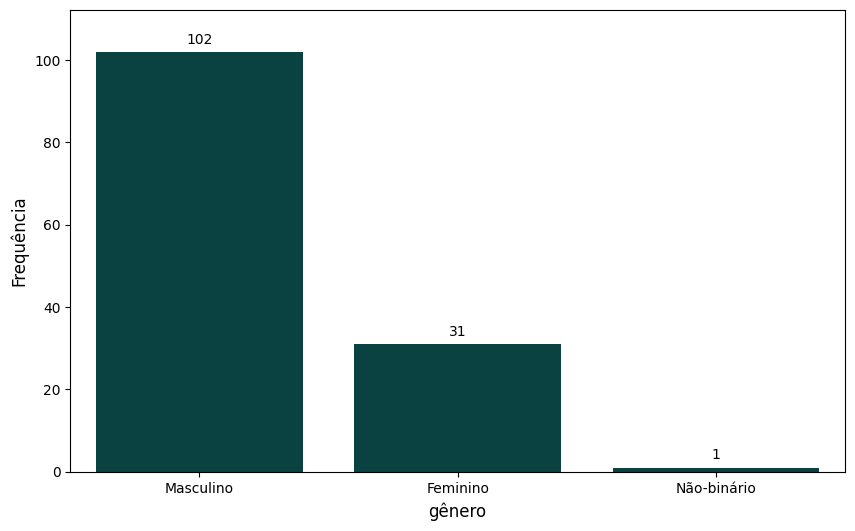

In [10]:
# Formatação visual do gráfico
custom_palette = ['#004b49']

plt.figure(figsize=(10, 6))

# Gráfico de barras
sns.countplot(
    data=df,
    x='gênero',
    order=df['gênero'].value_counts().index,
    palette=custom_palette)

# Formatação da legenda
plt.xlabel('gênero', fontsize=12, labelpad=5)
plt.ylabel('Frequência', fontsize=12)

# Formatação da borda em volta do gráfico
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Limites do eixo Y para deixar espaço para os rótulos
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

# Formatação dos rótulos dos dados
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.show()

### Raça ####

In [11]:
# Contagem raça

df['raça'].value_counts()

,count
raça,
Branca,100
Parda,25
Amarela,6
Preta,2
Irrelevante,1


In [12]:
# Proporção raça

percentagem_raca = df['raça'].value_counts(normalize=True) * 100
percentagem_raca

,proportion
raça,
Branca,74.626866
Parda,18.656716
Amarela,4.477612
Preta,1.492537
Irrelevante,0.746269


/tmp/ipython-input-13-2491412303.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-13-2491412303.py:7: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


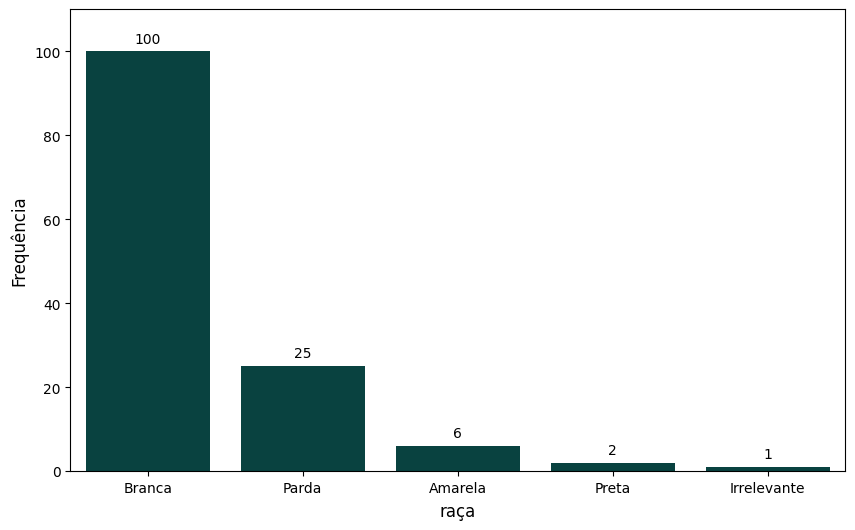

In [13]:
# Formatação visual do gráfico
custom_palette = ['#004b49']

plt.figure(figsize=(10, 6))

# Gráfico de barras
sns.countplot(
    data=df,
    x='raça',
    order=df['raça'].value_counts().index,
    palette=custom_palette)

# Formatação da legenda
plt.xlabel('raça', fontsize=12, labelpad=5)
plt.ylabel('Frequência', fontsize=12)

# Formatação da borda em volta do gráfico
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Limites do eixo Y para deixar espaço para os rótulos
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

# Formatação dos rótulos dos dados
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.show()

### UF ###

In [14]:
# Contagem UF

df['UF'].value_counts()

,count
UF,
SP,47
CE,11
MG,11
PR,10
RS,8
Moro no exterior,7
RN,6
BA,6
RJ,6


In [15]:
# Proporção UF

percentagem_uf = df['UF'].value_counts(normalize=True) * 100
percentagem_uf

,proportion
UF,
SP,35.074627
CE,8.208955
MG,8.208955
PR,7.462687
RS,5.970149
Moro no exterior,5.223881
RN,4.477612
BA,4.477612
RJ,4.477612


/tmp/ipython-input-16-3589195619.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-16-3589195619.py:7: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


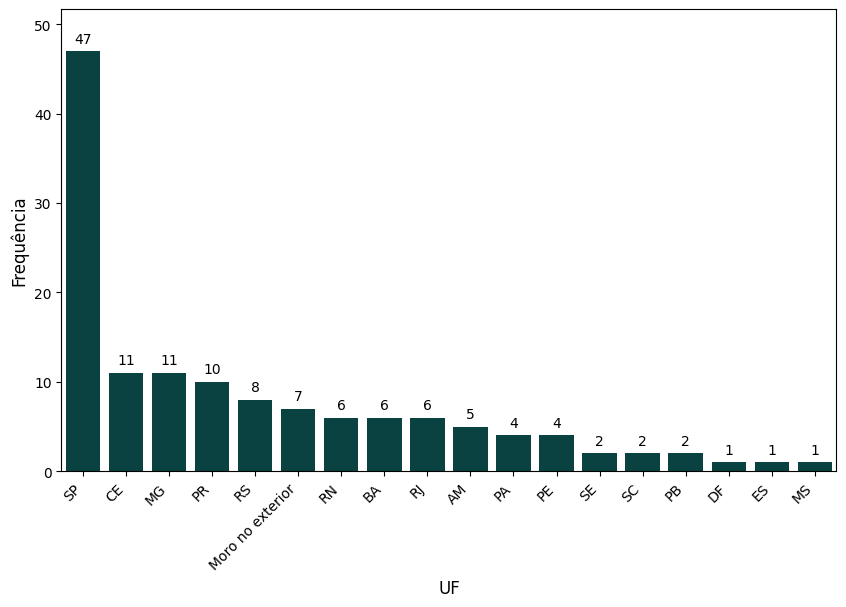

In [16]:
# Formatação visual do gráfico
custom_palette = ['#004b49']

plt.figure(figsize=(10, 6))

# Gráfico de barras
sns.countplot(
    data=df,
    x='UF',
    order=df['UF'].value_counts().index,
    palette=custom_palette)

# Formatação da legenda
plt.xlabel('UF', fontsize=12, labelpad=5)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Formatação da borda em volta do gráfico
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Limites do eixo Y para deixar espaço para os rótulos
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

# Formatação dos rótulos dos dados
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.show()

### Faixa etária ###

In [17]:
# Contagem idade

df['idade'].value_counts()

,count
idade,
26-30,24
41-45,22
18-25,19
36-40,18
31-35,17
46-50,13
51-55,8
56-60,7
Acima de 60,6


In [18]:
# Proporção idade

percentagem_idade = df['idade'].value_counts(normalize=True) * 100
percentagem_idade

,proportion
idade,
26-30,17.910448
41-45,16.417910
18-25,14.179104
36-40,13.432836
31-35,12.686567
46-50,9.701493
51-55,5.970149
56-60,5.223881
Acima de 60,4.477612


/tmp/ipython-input-19-1443565568.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-19-1443565568.py:7: UserWarning: 
The palette list has fewer values (1) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


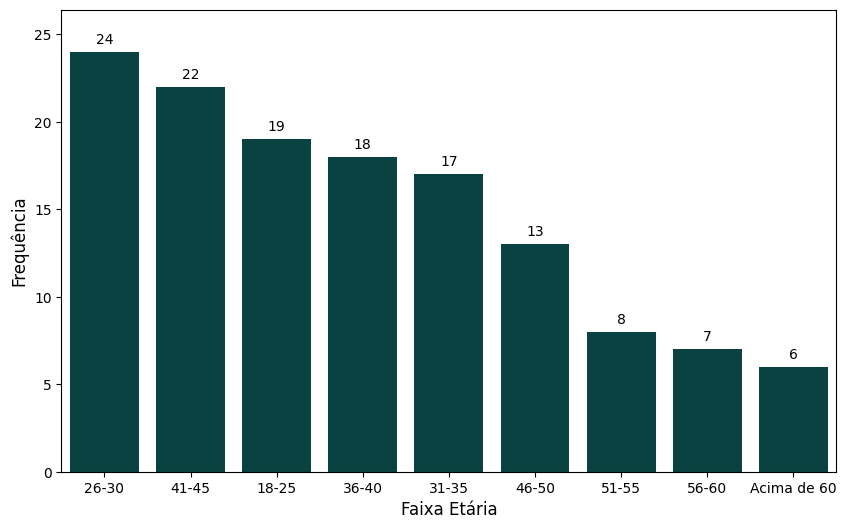

In [19]:
# Formatação visual do gráfico
custom_palette = ['#004b49']

plt.figure(figsize=(10, 6))

# Gráfico de barras
sns.countplot(
    data=df,
    x='idade',
    order=df['idade'].value_counts().index,
    palette=custom_palette)

# Formatação da legenda
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Frequência', fontsize=12)


# Formatação da borda em volta do gráfico
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Limites do eixo Y para deixar espaço para os rótulos
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

# Formatação dos rótulos dos dados
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.show()

In [20]:
# Obter ponto médio das faixas etárias para média de idade

ponto_medio = {
    '18-25': 21.5,
    '26-30': 28,
    '31-35': 33,
    '36-40': 38,
    '41-45': 43,
    '46-50': 48,
    '51-55': 53,
    '56-60': 58,
    'Acima de 60': 80,
}

df['pto_medio_idade'] = df['idade'].replace(ponto_medio)
df.head()

/tmp/ipython-input-20-3370985917.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pto_medio_idade'] = df['idade'].replace(ponto_medio)


,Carimbo de data/hora,gênero,raça,idade,UF,ocupação,uso_IA,Q1,Q2,Q3,...,MT_Q1,MT_Q2,MT_Q3,MT_Q4,MT_Q5,MT_Q6,MT_Q7,MT_Q8,"Por fim, gostaria de deixar algum comentário ou feedback?",pto_medio_idade
0,11/10/2023 16:22:40,Masculino,Parda,41-45,SP,Professor Doutor,Com frequência,Concordo totalmente,Concordo totalmente,Discordo mais do que concordo,...,Mais de 20% até 40%,Mais de 60% até 80%,Mais de 80%,Mais de 60% até 80%,Mais de 60% até 80%,Mais de 80%,Mais de 40% até 60%,Mais de 60% até 80%,NaN,43.0
1,11/10/2023 22:53:13,Masculino,Branca,41-45,SP,Professor Associado,Com frequência,Concordo mais do que discordo,Concordo totalmente,Concordo mais do que discordo,...,Mais de 60% até 80%,Mais de 80%,Mais de 60% até 80%,Mais de 60% até 80%,Mais de 40% até 60%,Mais de 40% até 60%,Mais de 20% até 40%,Mais de 60% até 80%,NaN,43.0
2,11/12/2023 8:33:47,Masculino,Irrelevante,41-45,Moro no exterior,Professor,Com frequência,Concordo mais do que discordo,Concordo mais do que discordo,Discordo totalmente,...,Mais de 80%,Mais de 80%,Até 20%,Mais de 80%,Mais de 80%,Mais de 80%,Mais de 60% até 80%,Mais de 40% até 60%,NaN,43.0
3,11/12/2023 19:09:58,Masculino,Branca,41-45,SP,Professor universitário,Com frequência,Concordo mais do que discordo,Discordo totalmente,Concordo mais do que discordo,...,Mais de 60% até 80%,Mais de 80%,Mais de 40% até 60%,Mais de 40% até 60%,Mais de 80%,Mais de 60% até 80%,Mais de 40% até 60%,Mais de 60% até 80%,NaN,43.0
4,11/14/2023 8:53:54,Masculino,Branca,56-60,SP,Professor Titular,Com frequência,Concordo totalmente,Concordo mais do que discordo,Concordo mais do que discordo,...,Mais de 60% até 80%,Mais de 80%,Mais de 60% até 80%,Mais de 60% até 80%,Mais de 80%,Mais de 80%,Mais de 20% até 40%,Mais de 80%,NaN,58.0


In [21]:
# Média de idade

df['pto_medio_idade'].mean()

np.float64(38.84701492537314)

In [22]:
# Meidana de idade

df['pto_medio_idade'].median()

38.0

### Ocupação ###

In [23]:
# Contagem ocupação

df['ocupação'].value_counts()

,count
ocupação,
Professor,22
Professor universitário,7
Professora,6
Pesquisador,4
Estudante,4
...,...
Professor-Pesquisador,1
Engenheiro Full Stack,1
Estudante de doutorado,1


In [24]:
# Agregar respostas semlehantes; criar uma nova coluna indicando se a ocupação contém "professor" ou "docente"

def categorizar_ocupacao(ocupacao):
    ocupacao_lower = ocupacao.lower()
    if any(keyword in ocupacao_lower for keyword in ['professor', 'docente', 'professora']):
        return 'Docente'
    elif any(keyword in ocupacao_lower for keyword in ['doutorando', 'aluno de doutorado', 'doutoranda', 'doutorando bolsista', 'pesquisador (doutorado)', 'estudante de doutorado']):
        return 'Pesquisador (doutorado)'
    elif any(keyword in ocupacao_lower for keyword in ['pesquisador de pós-doutorado', 'post-doc', 'pesquisadora de pós-doc']):
        return 'Pesquisador (pós-doutorado)'
    elif any(keyword in ocupacao_lower for keyword in ['mestrando', 'pesquisador(mestrado)', 'mestranda', 'estudante de mestrado']):
        return 'Pesquisador (mestrado)'
    elif any(keyword in ocupacao_lower for keyword in ['cientista de dados', 'cientistade dado']):
        return 'Cientista de Dados'
    elif any(keyword in ocupacao_lower for keyword in ['pesquisador', 'pesquisadora/estudante']):
        return 'Pesquisador'
    elif any(keyword in ocupacao_lower for keyword in ['analista de dados']):
        return 'Analista de Dados'
    elif any(keyword in ocupacao_lower for keyword in ['estudante']):
        return 'Estudante'
    else:
        return ocupacao

# Aplicar a função à coluna 'ocupação'
df['ocupacao_agrupada'] = df['ocupação'].apply(categorizar_ocupacao)

In [25]:
# Conatagem ocupação agrupada

df['ocupacao_agrupada'].value_counts()

,count
ocupacao_agrupada,
Docente,74
Pesquisador,10
Pesquisador (doutorado),9
Estudante,8
Cientista de Dados,7
Pesquisador (pós-doutorado),5
Pesquisador (mestrado),4
Analista de Dados,3
Engenheiro de IA,1


In [26]:
# Proporção ocupação agrupada

percentagem_ocupacao = df['ocupacao_agrupada'].value_counts(normalize=True) * 100
percentagem_ocupacao

,proportion
ocupacao_agrupada,
Docente,55.223881
Pesquisador,7.462687
Pesquisador (doutorado),6.716418
Estudante,5.970149
Cientista de Dados,5.223881
Pesquisador (pós-doutorado),3.731343
Pesquisador (mestrado),2.985075
Analista de Dados,2.238806
Engenheiro de IA,0.746269


/tmp/ipython-input-27-2255167147.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-27-2255167147.py:7: UserWarning: 
The palette list has fewer values (1) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


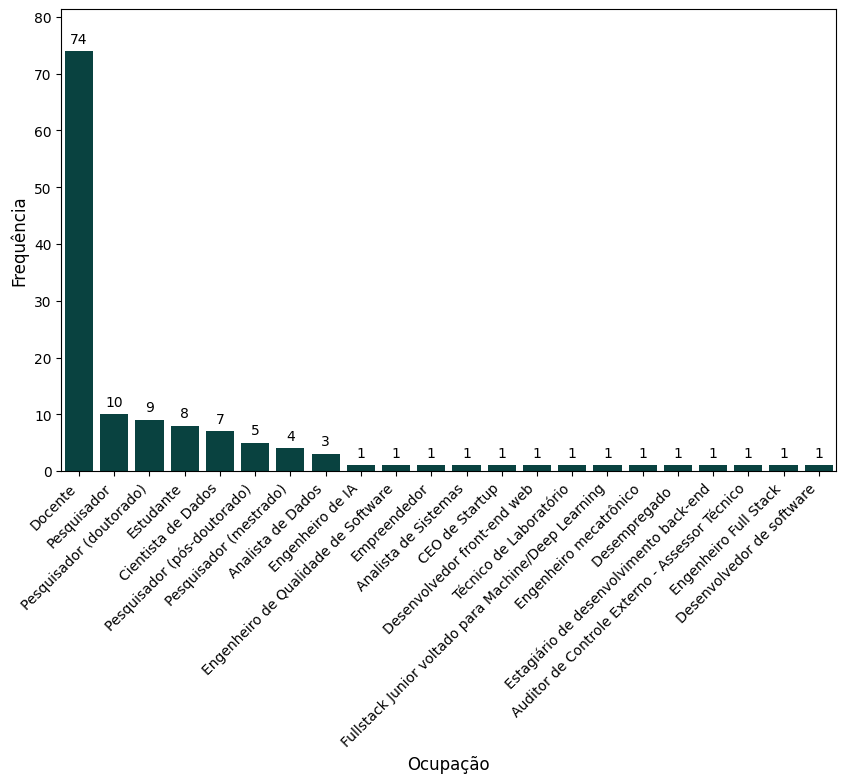

In [27]:
# Formatação visual do gráfico
custom_palette = ['#004b49']

plt.figure(figsize=(10, 6))

# Gráfico de barras
sns.countplot(
    data=df,
    x='ocupacao_agrupada',
    order=df['ocupacao_agrupada'].value_counts().index,
    palette=custom_palette)

# Formatação da legenda
plt.xlabel('Ocupação', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Inclinar os valores no eixo x

# Formatação da borda em volta do gráfico
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Limites do eixo Y para deixar espaço para os rótulos
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

# Formtação dos rótulos dos dados
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.show()

### Uso de IA ###

In [28]:
# Contagem uso de IA

df['uso_IA'].value_counts()

,count
uso_IA,
Com frequência,112
Às vezes,15
Raramente,7


In [29]:
# Proporção uso de IA

percentagem_usoIA = df['uso_IA'].value_counts(normalize=True) * 100
percentagem_usoIA

,proportion
uso_IA,
Com frequência,83.582090
Às vezes,11.194030
Raramente,5.223881


/tmp/ipython-input-30-1719417036.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-30-1719417036.py:7: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


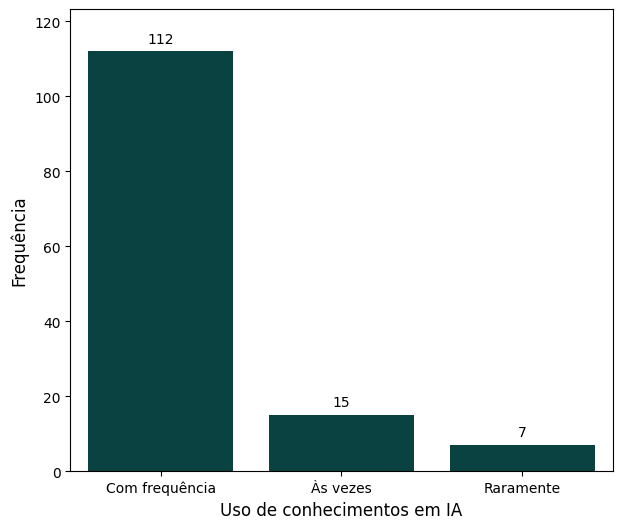

In [30]:
# Formatação visual do gráfico
custom_palette = ['#004b49']

plt.figure(figsize=(7, 6))

# Gráfico de barras
sns.countplot(
    data=df,
    x='uso_IA',
    order=df['uso_IA'].value_counts().index,
    palette=custom_palette)

# Formtação da legenda
plt.xlabel('Uso de conhecimentos em IA', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Formatação da borda em volta do gráfico
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Limites do eixo Y para deixar espaço para os rótulos
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

# Formtação dos rótulos dos dados
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.show()

## Análise cruzada

In [31]:
# Contagem ocupação x gênero

df_ocupgen = df.groupby('ocupação')['gênero'].value_counts()
df_ocupgen

,,count
ocupação,gênero,
Analista de Dados,Masculino,2
Analista de Sistemas,Masculino,1
Analista de TI e Pesquisador,Masculino,1
Analista de dados,Masculino,1
Auditor de Controle Externo - Assessor Técnico,Masculino,1
...,...,...
post-doc,Masculino,1
professor,Masculino,2
professor EBTT,Masculino,1


In [32]:
# Contagem ocupação x raça

df_ocupraca = df.groupby('ocupação')['raça'].value_counts()
df_ocupraca

ocupação                      raça  
Analista de Dados             Branca    1
                              Parda     1
Analista de Sistemas          Parda     1
Analista de TI e Pesquisador  Parda     1
Analista de dados             Branca    1
                                       ..
post-doc                      Branca    1
professor                     Branca    2
professor EBTT                Branca    1
professora                    Branca    1
professora universitaria      Branca    1
Name: count, Length: 88, dtype: int64

In [33]:
# Contagem uso de IA x idade

df_iagen = df.groupby('uso_IA')['idade'].value_counts()
df_iagen

uso_IA          idade      
Com frequência  26-30          23
                41-45          21
                36-40          15
                31-35          13
                18-25          12
                46-50           8
                51-55           8
                56-60           7
                Acima de 60     5
Raramente       36-40           2
                46-50           2
                18-25           1
                31-35           1
                Acima de 60     1
Às vezes        18-25           6
                31-35           3
                46-50           3
                26-30           1
                36-40           1
                41-45           1
Name: count, dtype: int64

# Análise Survey ###


In [34]:
df['Q1'].value_counts()

,count
Q1,
Concordo mais do que discordo,76
Discordo mais do que concordo,38
Concordo totalmente,18
Discordo totalmente,2


In [35]:
df['Q2'].value_counts()

,count
Q2,
Concordo totalmente,69
Concordo mais do que discordo,48
Discordo mais do que concordo,13
Discordo totalmente,4


In [36]:
df['Q3'].value_counts()

,count
Q3,
Concordo mais do que discordo,71
Discordo mais do que concordo,47
Discordo totalmente,9
Concordo totalmente,7


In [37]:
df['Q4'].value_counts()

,count
Q4,
Concordo mais do que discordo,59
Concordo totalmente,47
Discordo mais do que concordo,22
Discordo totalmente,6


In [38]:
df['Q5'].value_counts()

,count
Q5,
Concordo totalmente,64
Concordo mais do que discordo,46
Discordo mais do que concordo,17
Discordo totalmente,7


In [39]:
df['Q6'].value_counts()

,count
Q6,
Concordo mais do que discordo,57
Discordo mais do que concordo,51
Discordo totalmente,16
Concordo totalmente,10


In [40]:
df['Q7'].value_counts()

,count
Q7,
Discordo mais do que concordo,61
Discordo totalmente,40
Concordo mais do que discordo,25
Concordo totalmente,8


In [41]:
df['Q8'].value_counts()

,count
Q8,
Concordo mais do que discordo,86
Concordo totalmente,37
Discordo mais do que concordo,9
Discordo totalmente,2


In [42]:
# Porcentagem de respostas "concordo" e "discordo" para cada declaração

colunas_de_interesse = df.columns[7:14]
df_interesse = df[colunas_de_interesse]

for pergunta in df_interesse.columns:
    contagem_respostas = df_interesse[pergunta].value_counts()
    total_respostas = len(df_interesse[pergunta])

    porcentagem_concordototalmente = (contagem_respostas.get('Concordo totalmente', 0) / total_respostas) * 100
    porcentagem_concordomaisdoquediscordo = (contagem_respostas.get('Concordo mais do que discordo', 0) / total_respostas) * 100
    porcentagem_discordomaisdoqueconcordo = (contagem_respostas.get('Discordo mais do que concordo', 0) / total_respostas) * 100
    porcentagem_discordototalmente = (contagem_respostas.get('Discordo totalmente', 0) / total_respostas) * 100

    print(f'Pergunta: {pergunta}')
    print(f'Porcentagem Concordo totalmente: {porcentagem_concordototalmente:.2f}%')
    print(f'Porcentagem Concordo mais do que discordo: {porcentagem_concordomaisdoquediscordo:.2f}%')
    print(f'Porcentagem Discordo mais do que concordo: {porcentagem_discordomaisdoqueconcordo:.2f}%')
    print(f'Porcentagem Discordo totalmente: {porcentagem_discordototalmente:.2f}%')
    print()

Pergunta: Q1
Porcentagem Concordo totalmente: 13.43%
Porcentagem Concordo mais do que discordo: 56.72%
Porcentagem Discordo mais do que concordo: 28.36%
Porcentagem Discordo totalmente: 1.49%

Pergunta: Q2
Porcentagem Concordo totalmente: 51.49%
Porcentagem Concordo mais do que discordo: 35.82%
Porcentagem Discordo mais do que concordo: 9.70%
Porcentagem Discordo totalmente: 2.99%

Pergunta: Q3
Porcentagem Concordo totalmente: 5.22%
Porcentagem Concordo mais do que discordo: 52.99%
Porcentagem Discordo mais do que concordo: 35.07%
Porcentagem Discordo totalmente: 6.72%

Pergunta: Q4
Porcentagem Concordo totalmente: 35.07%
Porcentagem Concordo mais do que discordo: 44.03%
Porcentagem Discordo mais do que concordo: 16.42%
Porcentagem Discordo totalmente: 4.48%

Pergunta: Q5
Porcentagem Concordo totalmente: 47.76%
Porcentagem Concordo mais do que discordo: 34.33%
Porcentagem Discordo mais do que concordo: 12.69%
Porcentagem Discordo totalmente: 5.22%

Pergunta: Q6
Porcentagem Concordo tot

## Gráficos da distribuição de posicionamentos

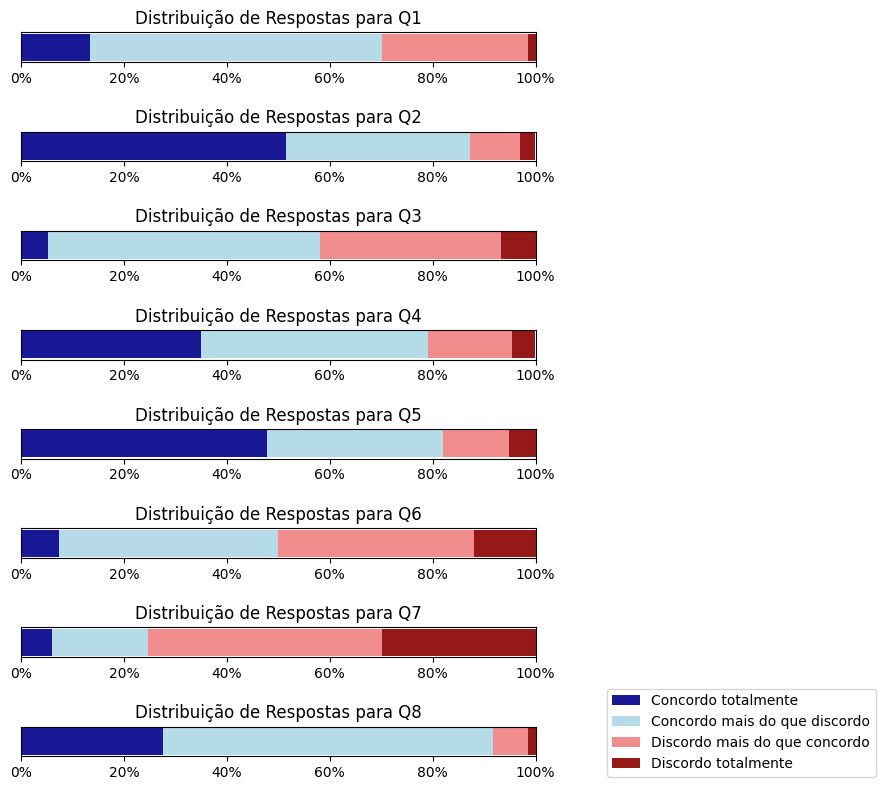

In [43]:
# Lista de todas as questões Q1, Q2, ..., Q8
questoes = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Definir as categorias e cores
categorias = ['Concordo totalmente', 'Concordo mais do que discordo', 'Discordo mais do que concordo', 'Discordo totalmente']
cores = ['darkblue', 'lightblue', 'lightcoral', 'darkred']

# Formatar o gráfico
plt.figure(figsize=(10, len(questoes)))

for i, coluna_resposta in enumerate(questoes, start=1):
    # Contar a porcentagem de respostas para a questão atual
    porcentagem = df[coluna_resposta].value_counts(normalize=True) * 100

    # Posição inicial da barra empilhada
    bottom = 0

    # Criar o gráfico de barras horizontal
    plt.subplot(len(questoes), 1, i)
    for categoria, cor in zip(categorias, cores):
        # Lidar com diferentes formas de grafia
        valor = porcentagem.get(categoria, 0)

        plt.barh([''], [valor], color=cor, alpha=0.9, left=bottom, height=0.2, )
        bottom += valor

    # Adicionar rótulos e título
    plt.title(f'Distribuição de Respostas para {coluna_resposta}')

    # Adicionar legenda à direita do gráfico
    if i == len(questoes):
        plt.legend(categorias, loc='center', bbox_to_anchor=(1.4, 0.8))

    # Ajustar limites do eixo x para 0-100%
    plt.xlim(0, 100)
    plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])

    # Remover ticks do eixo y
    plt.yticks([])

# Ajustar layout para evitar sobreposição de rótulos
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Análise Meta-Survey #

## Gráficos da distribuição de suposições sobre o posicionamento da maioria

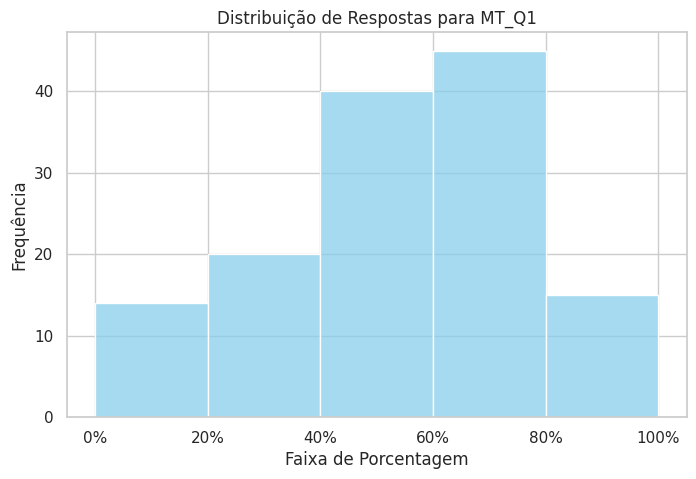

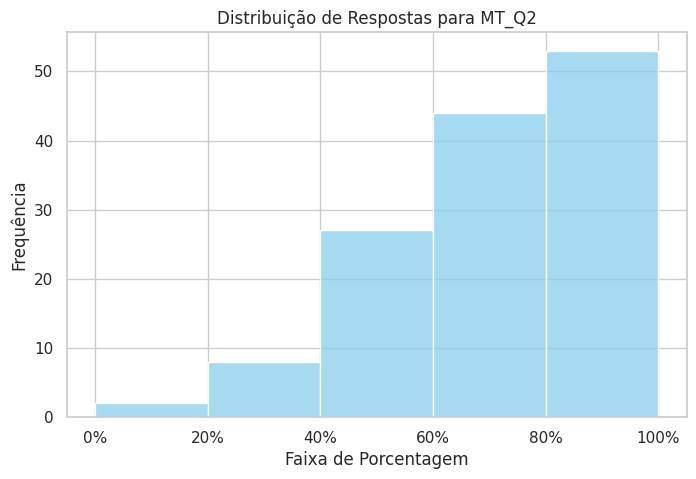

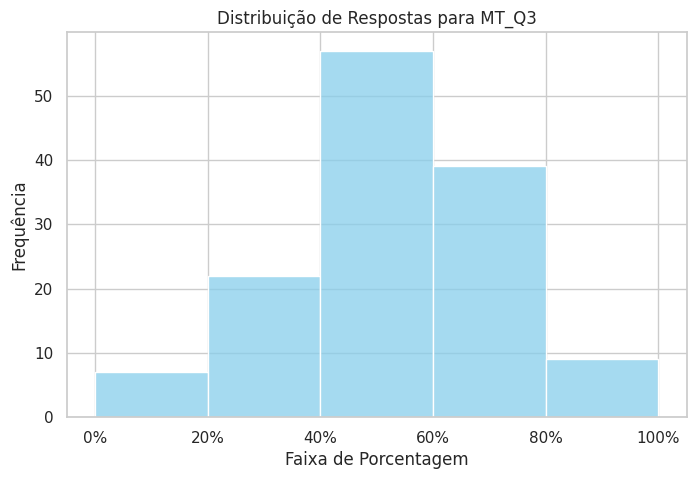

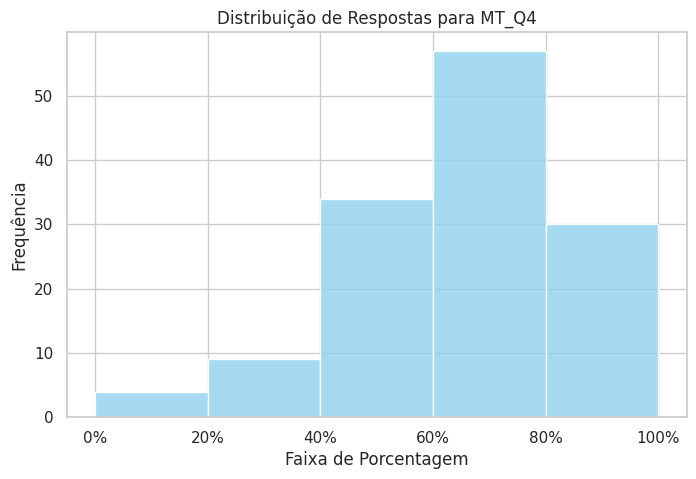

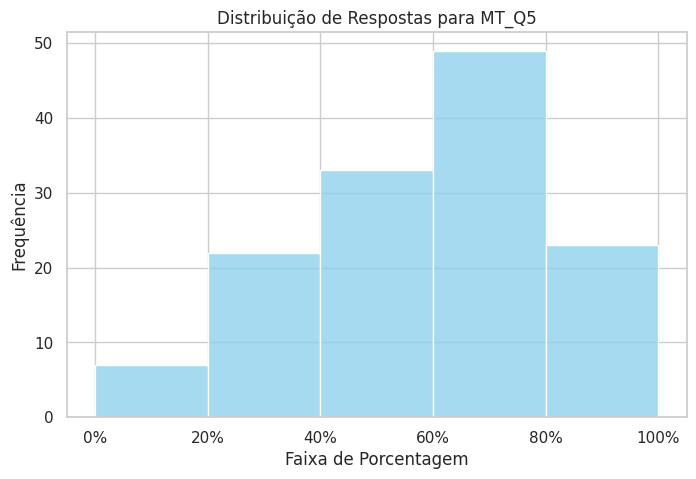

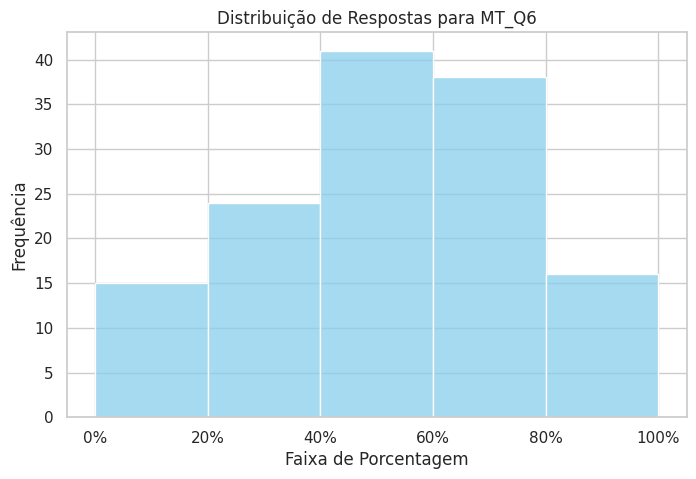

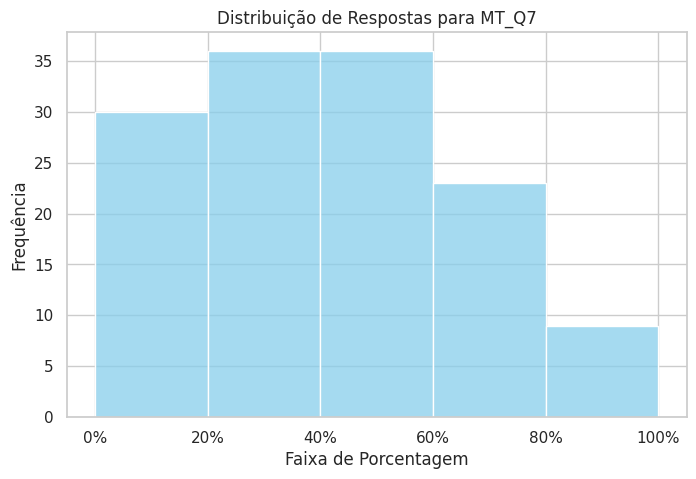

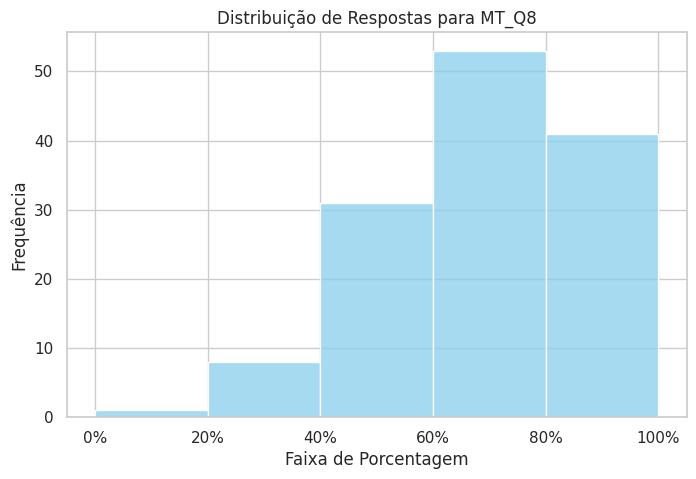

In [44]:
# Histogramas da distriuição de respostas às Meta-Questões

categorias = ['Até 20%', 'Mais de 20% até 40%', 'Mais de 40% até 60%', 'Mais de 60% até 80%', 'Mais de 80%']
mapping = {'Até 20%': 10, 'Mais de 20% até 40%': 30, 'Mais de 40% até 60%': 50, 'Mais de 60% até 80%': 70, 'Mais de 80%': 90}

# selecionar meta-questions
colunas_especificas = ['MT_Q1', 'MT_Q2', 'MT_Q3', 'MT_Q4', 'MT_Q5', 'MT_Q6', 'MT_Q7', 'MT_Q8']

sns.set(style="whitegrid")

for coluna in colunas_especificas:
    # Aplicar o mapeamento para a coluna específica
    df[coluna] = df[coluna].map(mapping)

    # Configurar o gráfico
    plt.figure(figsize=(8, 5))
    sns.histplot(df[coluna], bins=[0, 20, 40, 60, 80, 100], color='skyblue', edgecolor="w")

    plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])

    # Adicionar rótulos e título
    plt.xlabel('Faixa de Porcentagem')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição de Respostas para {coluna}')

    # Exibir o gráfico
    plt.show()

# Intervalos de confiança

Obter valores dos intervalos de confiança de 95% para as Questões e Meta-Questões

QUESTÕES:

In [45]:
# Agregar 'concordo totalmente' e 'concordo mais do que discordo'

respostas = {
    'Concordo totalmente': 'Concordo',
    'Concordo mais do que discordo': 'Concordo',
    'Discordo mais do que concordo': 'Discordo',
    'Discordo totalmente': 'Discordo'
}

# Lista de colunas a serem substituídas
colunas_questoes = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Criar uma cópia do DataFrame original
df2 = df.copy()

# Substituir os valores nas colunas especificadas na cópia
for col in colunas_questoes:
    df2[col] = df2[col].replace(respostas)

df2.head()

,Carimbo de data/hora,gênero,raça,idade,UF,ocupação,uso_IA,Q1,Q2,Q3,...,MT_Q2,MT_Q3,MT_Q4,MT_Q5,MT_Q6,MT_Q7,MT_Q8,"Por fim, gostaria de deixar algum comentário ou feedback?",pto_medio_idade,ocupacao_agrupada
0,11/10/2023 16:22:40,Masculino,Parda,41-45,SP,Professor Doutor,Com frequência,Concordo,Concordo,Discordo,...,70,90,70,70,90,50,70,NaN,43.0,Docente
1,11/10/2023 22:53:13,Masculino,Branca,41-45,SP,Professor Associado,Com frequência,Concordo,Concordo,Concordo,...,90,70,70,50,50,30,70,NaN,43.0,Docente
2,11/12/2023 8:33:47,Masculino,Irrelevante,41-45,Moro no exterior,Professor,Com frequência,Concordo,Concordo,Discordo,...,90,10,90,90,90,70,50,NaN,43.0,Docente
3,11/12/2023 19:09:58,Masculino,Branca,41-45,SP,Professor universitário,Com frequência,Concordo,Discordo,Concordo,...,90,50,50,90,70,50,70,NaN,43.0,Docente
4,11/14/2023 8:53:54,Masculino,Branca,56-60,SP,Professor Titular,Com frequência,Concordo,Concordo,Concordo,...,90,70,70,90,90,30,90,NaN,58.0,Docente


In [46]:
# Fração de pessoas que concordam com Q1
p_hat = df2['Q1'].value_counts().get('Concordo', 0) / len(df2['Q1'])

n = len(df2['Q1'])


# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem


print(f'Fração de pessoas que concordam: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Fração de pessoas que concordam: 0.7014925373134329
Intervalo de confiança de 95%: (0.6193, 0.7725)


In [47]:
# Fração de pessoas que concordam com Q2
p_hat = df2['Q2'].value_counts().get('Concordo', 0) / len(df2['Q2'])

n = len(df2['Q2'])


# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem

print(f'Fração de pessoas que concordam: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Fração de pessoas que concordam: 0.8731343283582089
Intervalo de confiança de 95%: (0.8062, 0.9193)


In [48]:
# Fração de pessoas que concordam com Q3
p_hat = df2['Q3'].value_counts().get('Concordo', 0) / len(df2['Q3'])

n = len(df2['Q3'])


# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem

print(f'Fração de pessoas que concordam: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Fração de pessoas que concordam: 0.582089552238806
Intervalo de confiança de 95%: (0.4974, 0.6622)


In [49]:
# Fração de pessoas que concordam com Q4
p_hat = df2['Q4'].value_counts().get('Concordo', 0) / len(df2['Q4'])

n = len(df2['Q4'])


# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem

print(f'Fração de pessoas que concordam: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Fração de pessoas que concordam: 0.7910447761194029
Intervalo de confiança de 95%: (0.7146, 0.8513)


In [50]:
# Fração de pessoas que concordam com Q5
p_hat = df2['Q5'].value_counts().get('Concordo', 0) / len(df2['Q5'])

n = len(df2['Q5'])


# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem

print(f'Fração de pessoas que concordam: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Fração de pessoas que concordam: 0.8208955223880597
Intervalo de confiança de 95%: (0.7473, 0.8766)


In [51]:
# Fração de pessoas que concordam com Q6
p_hat = df2['Q6'].value_counts().get('Concordo', 0) / len(df2['Q6'])

n = len(df2['Q6'])


# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem

print(f'Fração de pessoas que concordam: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Fração de pessoas que concordam: 0.5
Intervalo de confiança de 95%: (0.4165, 0.5835)


In [52]:
# Fração de pessoas que concordam com Q7
p_hat = df2['Q7'].value_counts().get('Concordo', 0) / len(df2['Q7'])

n = len(df2['Q7'])


# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem

print(f'Fração de pessoas que concordam: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Fração de pessoas que concordam: 0.2462686567164179
Intervalo de confiança de 95%: (0.1811, 0.3256)


In [53]:
# Fração de pessoas que concordam com Q8
p_hat = df2['Q8'].value_counts().get('Concordo', 0) / len(df2['Q8'])

n = len(df2['Q8'])


# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem

print(f'Fração de pessoas que concordam: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Fração de pessoas que concordam: 0.917910447761194
Intervalo de confiança de 95%: (0.8590, 0.9535)


META QUESTÕES:

In [54]:
# Substiuir dos intervalos das meta questions para os seus respectivos pontos médios

respostas = {
    'Até 20%': 0.1,
    'Mais que 20% até 40%': 0.3,
    'Mais de 40% até 60%': 0.5,
    'Mais de 60% até 80%': 0.7,
    'Mais de 80%': 0.9
}

for coluna in df.columns:
    df[coluna] = df[coluna].replace(respostas)

df.head()

,Carimbo de data/hora,gênero,raça,idade,UF,ocupação,uso_IA,Q1,Q2,Q3,...,MT_Q2,MT_Q3,MT_Q4,MT_Q5,MT_Q6,MT_Q7,MT_Q8,"Por fim, gostaria de deixar algum comentário ou feedback?",pto_medio_idade,ocupacao_agrupada
0,11/10/2023 16:22:40,Masculino,Parda,41-45,SP,Professor Doutor,Com frequência,Concordo totalmente,Concordo totalmente,Discordo mais do que concordo,...,70,90,70,70,90,50,70,NaN,43.0,Docente
1,11/10/2023 22:53:13,Masculino,Branca,41-45,SP,Professor Associado,Com frequência,Concordo mais do que discordo,Concordo totalmente,Concordo mais do que discordo,...,90,70,70,50,50,30,70,NaN,43.0,Docente
2,11/12/2023 8:33:47,Masculino,Irrelevante,41-45,Moro no exterior,Professor,Com frequência,Concordo mais do que discordo,Concordo mais do que discordo,Discordo totalmente,...,90,10,90,90,90,70,50,NaN,43.0,Docente
3,11/12/2023 19:09:58,Masculino,Branca,41-45,SP,Professor universitário,Com frequência,Concordo mais do que discordo,Discordo totalmente,Concordo mais do que discordo,...,90,50,50,90,70,50,70,NaN,43.0,Docente
4,11/14/2023 8:53:54,Masculino,Branca,56-60,SP,Professor Titular,Com frequência,Concordo totalmente,Concordo mais do que discordo,Concordo mais do que discordo,...,90,70,70,90,90,30,90,NaN,58.0,Docente


In [55]:
# Taxa mádia da concordância prevista
p_hat = df['MT_Q1'].sum()/ len(df['MT_Q1']) / 100

n = len(df['MT_Q1'])

# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem


print(f'Taxa média prevista de concordância: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Taxa média prevista de concordância: 0.5402985074626866
Intervalo de confiança de 95%: (0.4560, 0.6224)


In [56]:
# Taxa mádia da concordância prevista
p_hat = df['MT_Q2'].sum()/ len(df['MT_Q2']) / 100

n = len(df['MT_Q2'])

# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem


print(f'Taxa média prevista de concordância: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Taxa média prevista de concordância: 0.7059701492537314
Intervalo de confiança de 95%: (0.6240, 0.7765)


In [57]:
# Taxa mádia da concordância prevista
p_hat = df['MT_Q3'].sum()/ len(df['MT_Q3']) / 100

n = len(df['MT_Q3'])

# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem


print(f'Taxa média prevista de concordância: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Taxa média prevista de concordância: 0.5313432835820895
Intervalo de confiança de 95%: (0.4472, 0.6138)


In [58]:
# Taxa mádia da concordância prevista
p_hat = df['MT_Q4'].sum()/ len(df['MT_Q4']) / 100

n = len(df['MT_Q4'])

# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem


print(f'Taxa média prevista de concordância: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Taxa média prevista de concordância: 0.6492537313432836
Intervalo de confiança de 95%: (0.5653, 0.7249)


In [59]:
# Taxa mádia da concordância prevista
p_hat = df['MT_Q5'].sum()/ len(df['MT_Q5']) / 100

n = len(df['MT_Q5'])

# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem


print(f'Taxa média prevista de concordância: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Taxa média prevista de concordância: 0.5880597014925373
Intervalo de confiança de 95%: (0.5034, 0.6678)


In [60]:
# Taxa mádia da concordância prevista
p_hat = df['MT_Q6'].sum()/ len(df['MT_Q6']) / 100

n = len(df['MT_Q6'])

# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem


print(f'Taxa média prevista de concordância: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Taxa média prevista de concordância: 0.5238805970149254
Intervalo de confiança de 95%: (0.4398, 0.6066)


In [61]:
# Taxa mádia da concordância prevista
p_hat = df['MT_Q7'].sum()/ len(df['MT_Q7']) / 100

n = len(df['MT_Q7'])

# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem


print(f'Taxa média prevista de concordância: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Taxa média prevista de concordância: 0.41791044776119407
Intervalo de confiança de 95%: (0.3378, 0.5026)


In [62]:
# Taxa mádia da concordância prevista
p_hat = df['MT_Q8'].sum()/ len(df['MT_Q8']) / 100

n = len(df['MT_Q8'])

# Nível de confiança e valor z-score
confianca = 0.95
z = norm.ppf(1 - (1 - confianca) / 2)  # valor z para confiança de 95%

# Aplicar a fórmula do intervalo de confiança de Wilson
denominador = 1 + z**2 / n
centro = (p_hat + z**2 / (2 * n)) / denominador
margem = z * ((p_hat * (1 - p_hat) / n + z**2 / (4 * n**2))**0.5) / denominador

# Intervalo de confiança
ic_inferior = centro - margem
ic_superior = centro + margem


print(f'Taxa média prevista de concordância: {p_hat}')
print(f'Intervalo de confiança de 95%: ({ic_inferior:.4f}, {ic_superior:.4f})')

Taxa média prevista de concordância: 0.6865671641791045
Intervalo de confiança de 95%: (0.6038, 0.7590)


## Gráficos finais

Gráficos da distriuição das respostas às Questões:

Obter os gráficos dos resultados das Questões em novo formato, incluindo o ponto com o valor da porcentagem que ralmente concorda e linha do intervalo de confiança (95%):

In [63]:
# Lista de todas as questões Q1, Q2, ..., Q8
questoes = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Definir as categorias e cores
categorias = ['Concordo totalmente', 'Concordo mais do que discordo', 'Discordo mais do que concordo', 'Discordo totalmente']
cores = ['darkblue', 'lightblue', 'lightcoral', 'darkred']

# Lista de valores médios e intervalos de confiança calculados
valores_medios = [70, 87, 58, 79, 82, 50, 25, 92]
intervalos_confianca = [(61.93, 77.25), (80.62, 91.93), (49.74, 66.22), (71.46, 85.13), (74.73, 87.66), (41.65, 58.35), (18.11, 32.56), (85.90, 95.35)]
c = [(8, 7), (7, 8), (8, 8), (8, 7), (8, 8), (7,8), (8,8), (8,7)]

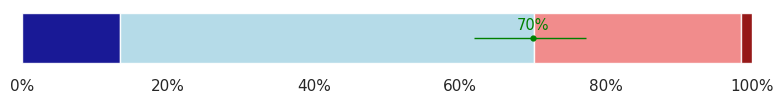

In [64]:
def plot_questao(df, questao, categorias, cores, valores_medios, intervalos_confianca):
    # Contar a porcentagem de respostas para a questão atual
    porcentagem = df[questao].value_counts(normalize=True) * 100

    # Formatar o gráfico para uma questão
    plt.figure(figsize=(8, 1.2))
    bottom = 0

    # Retirar bordar
    sns.set(style="white", rc={"axes.spines.left": False, "axes.spines.right": False,
                           "axes.spines.bottom": False, "axes.spines.top": False})

    # Criar o gráfico de barras horizontal para a questão
    for categoria, cor in zip(categorias, cores):
      valor = porcentagem.get(categoria, 0)
      plt.barh([questao], [valor], color=cor, alpha=0.9, left=bottom, height=0.2)
      bottom += valor

    # Encontrar o índice da questão atual
    index_questao = questoes.index(questao)

    # Corrigir o índice para os valores e intervalos de confiança
    ponto_especifico = valores_medios[index_questao]
    intervalo_confianca_questao = intervalos_confianca[index_questao]

    plt.scatter(ponto_especifico, 0, color='green', zorder=5, s=12)
    plt.hlines(0, *intervalo_confianca_questao, colors='green', zorder=4, linewidth=1)

    # Adicionar rótulo em cima do ponto específico (valor médio)
    plt.text(ponto_especifico, 0.02, f'{ponto_especifico}%', ha='center', va='bottom', color='green', fontsize = 10.5)

    # Ajustar limites do eixo x para 0-100% e definir os ticks
    plt.xlim(0, 100)
    plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])

    # Remover ticks do eixo y desnecessários
    plt.yticks([])

    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para a questão Q1
plot_questao(df, 'Q1', categorias, cores, valores_medios, intervalos_confianca)

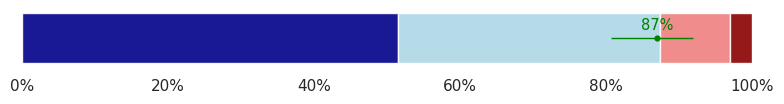

In [65]:
def plot_questao(df, questao, categorias, cores, valores_medios, intervalos_confianca):
    # Contar a porcentagem de respostas para a questão atual
    porcentagem = df[questao].value_counts(normalize=True) * 100

    # Formatar o gráfico para uma questão
    plt.figure(figsize=(8, 1.2))
    bottom = 0

    # Retirar bordar
    sns.set(style="white", rc={"axes.spines.left": False, "axes.spines.right": False,
                           "axes.spines.bottom": False, "axes.spines.top": False})

    # Criar o gráfico de barras horizontal para a questão
    for categoria, cor in zip(categorias, cores):
      valor = porcentagem.get(categoria, 0)
      plt.barh([questao], [valor], color=cor, alpha=0.9, left=bottom, height=0.2)
      bottom += valor

    # Encontrar o índice da questão atual
    index_questao = questoes.index(questao)

    # Corrigir o índice para os valores e intervalos de confiança
    ponto_especifico = valores_medios[index_questao]
    intervalo_confianca_questao = intervalos_confianca[index_questao]

    plt.scatter(ponto_especifico, 0, color='green', zorder=5, s=12)
    plt.hlines(0, *intervalo_confianca_questao, colors='green', zorder=4, linewidth=1)

    # Adicionar rótulo em cima do ponto específico (valor médio)
    plt.text(ponto_especifico, 0.02, f'{ponto_especifico}%', ha='center', va='bottom', color='green', fontsize = 10.5)

    # Ajustar limites do eixo x para 0-100% e definir os ticks
    plt.xlim(0, 100)
    plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])

    # Remover ticks do eixo y desnecessários
    plt.yticks([])

    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para a questão Q2
plot_questao(df, 'Q2', categorias, cores, valores_medios, intervalos_confianca)

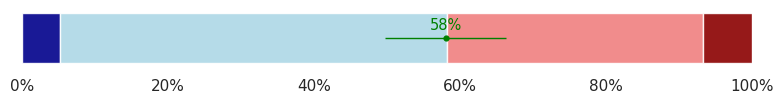

In [66]:
def plot_questao(df, questao, categorias, cores, valores_medios, intervalos_confianca):
    # Calcular a porcentagem de respostas para a questão
    porcentagem = df[questao].value_counts(normalize=True) * 100

    # Formatar o gráfico para uma questão
    plt.figure(figsize=(8, 1.2))
    bottom = 0

    # Retirar bordar
    sns.set(style="white", rc={"axes.spines.left": False, "axes.spines.right": False,
                           "axes.spines.bottom": False, "axes.spines.top": False})

    # Criar o gráfico de barras horizontal para a questão
    for categoria, cor in zip(categorias, cores):
      valor = porcentagem.get(categoria, 0)
      plt.barh([questao], [valor], color=cor, alpha=0.9, left=bottom, height=0.2)
      bottom += valor

    # Encontrar o índice da questão atual
    index_questao = questoes.index(questao)

    # Corrigir o índice para os valores e intervalos de confiança
    ponto_especifico = valores_medios[index_questao]
    intervalo_confianca_questao = intervalos_confianca[index_questao]

    plt.scatter(ponto_especifico, 0, color='green', zorder=5, s=12)
    plt.hlines(0, *intervalo_confianca_questao, colors='green', zorder=4, linewidth=1)

    # Adicionar rótulo em cima do ponto específico (valor médio)
    plt.text(ponto_especifico, 0.02, f'{ponto_especifico}%', ha='center', va='bottom', color='green', fontsize = 10.5)

    # Ajustar limites do eixo x para 0-100% e definir os ticks
    plt.xlim(0, 100)
    plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])

    # Remover ticks do eixo y desnecessários
    plt.yticks([])

    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para a questão Q3
plot_questao(df, 'Q3', categorias, cores, valores_medios, intervalos_confianca)

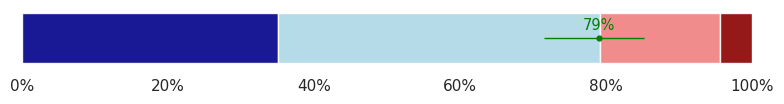

In [67]:
def plot_questao(df, questao, categorias, cores, valores_medios, intervalos_confianca):
    # Calcular a porcentagem de respostas para a questão
    porcentagem = df[questao].value_counts(normalize=True) * 100

    # Formatar o gráfico para uma questão
    plt.figure(figsize=(8, 1.2))
    bottom = 0

    # Retirar bordar
    sns.set(style="white", rc={"axes.spines.left": False, "axes.spines.right": False,
                           "axes.spines.bottom": False, "axes.spines.top": False})

    # Criar o gráfico de barras horizontal para a questão
    for categoria, cor in zip(categorias, cores):
      valor = porcentagem.get(categoria, 0)
      plt.barh([questao], [valor], color=cor, alpha=0.9, left=bottom, height=0.2)
      bottom += valor

    # Encontrar o índice da questão atual
    index_questao = questoes.index(questao)

    # Corrigir o índice para os valores e intervalos de confiança
    ponto_especifico = valores_medios[index_questao]
    intervalo_confianca_questao = intervalos_confianca[index_questao]

    plt.scatter(ponto_especifico, 0, color='green', zorder=5, s=12)
    plt.hlines(0, *intervalo_confianca_questao, colors='green', zorder=4, linewidth=1)

    # Adicionar rótulo em cima do ponto específico (valor médio)
    plt.text(ponto_especifico, 0.02, f'{ponto_especifico}%', ha='center', va='bottom', color='green', fontsize = 10.5)

    # Ajustar limites do eixo x para 0-100% e definir os ticks
    plt.xlim(0, 100)
    plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])

    # Remover ticks do eixo y desnecessários
    plt.yticks([])

    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para a questão Q4
plot_questao(df, 'Q4', categorias, cores, valores_medios, intervalos_confianca)

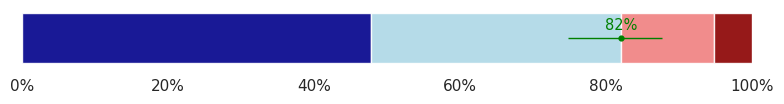

In [68]:
def plot_questao(df, questao, categorias, cores, valores_medios, intervalos_confianca):
    # Calcular a porcentagem de respostas para a questão
    porcentagem = df[questao].value_counts(normalize=True) * 100

    # Formatar o gráfico para uma questão
    plt.figure(figsize=(8, 1.2))
    bottom = 0

    # Retirar bordar
    sns.set(style="white", rc={"axes.spines.left": False, "axes.spines.right": False,
                           "axes.spines.bottom": False, "axes.spines.top": False})

    # Criar o gráfico de barras horizontal para a questão
    for categoria, cor in zip(categorias, cores):
      valor = porcentagem.get(categoria, 0)
      plt.barh([questao], [valor], color=cor, alpha=0.9, left=bottom, height=0.2)
      bottom += valor

    # Encontrar o índice da questão atual
    index_questao = questoes.index(questao)

    # Corrigir o índice para os valores e intervalos de confiança
    ponto_especifico = valores_medios[index_questao]
    intervalo_confianca_questao = intervalos_confianca[index_questao]

    plt.scatter(ponto_especifico, 0, color='green', zorder=5, s=12)
    plt.hlines(0, *intervalo_confianca_questao, colors='green', zorder=4, linewidth=1)

    # Adicionar rótulo em cima do ponto específico (valor médio)
    plt.text(ponto_especifico, 0.02, f'{ponto_especifico}%', ha='center', va='bottom', color='green', fontsize = 10.5)

    # Ajustar limites do eixo x para 0-100% e definir os ticks
    plt.xlim(0, 100)
    plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])

    # Remover ticks do eixo y desnecessários
    plt.yticks([])

    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para a questão Q5
plot_questao(df, 'Q5', categorias, cores, valores_medios, intervalos_confianca)

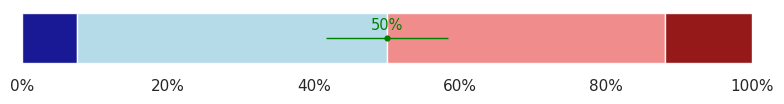

In [69]:
def plot_questao(df, questao, categorias, cores, valores_medios, intervalos_confianca):
    # Calcular a porcentagem de respostas para a questão
    porcentagem = df[questao].value_counts(normalize=True) * 100

    # Formatar o gráfico para uma questão
    plt.figure(figsize=(8, 1.2))
    bottom = 0

    # Retirar bordar
    sns.set(style="white", rc={"axes.spines.left": False, "axes.spines.right": False,
                           "axes.spines.bottom": False, "axes.spines.top": False})

    # Criar o gráfico de barras horizontal para a questão
    for categoria, cor in zip(categorias, cores):
      valor = porcentagem.get(categoria, 0)
      plt.barh([questao], [valor], color=cor, alpha=0.9, left=bottom, height=0.2)
      bottom += valor

    # Encontrar o índice da questão atual
    index_questao = questoes.index(questao)

    # Corrigir o índice para os valores e intervalos de confiança
    ponto_especifico = valores_medios[index_questao]
    intervalo_confianca_questao = intervalos_confianca[index_questao]

    plt.scatter(ponto_especifico, 0, color='green', zorder=5, s=12)
    plt.hlines(0, *intervalo_confianca_questao, colors='green', zorder=4, linewidth=1)

    # Adicionar rótulo em cima do ponto específico (valor médio)
    plt.text(ponto_especifico, 0.02, f'{ponto_especifico}%', ha='center', va='bottom', color='green', fontsize = 10.5)

    # Ajustar limites do eixo x para 0-100% e definir os ticks
    plt.xlim(0, 100)
    plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])

    # Remover ticks do eixo y desnecessários
    plt.yticks([])

    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para a questão Q6
plot_questao(df, 'Q6', categorias, cores, valores_medios, intervalos_confianca)

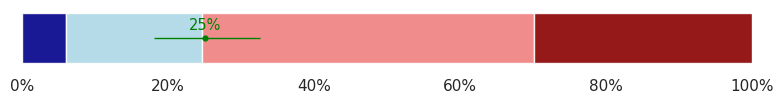

In [70]:
def plot_questao(df, questao, categorias, cores, valores_medios, intervalos_confianca):
    # Calcular a porcentagem de respostas para a questão
    porcentagem = df[questao].value_counts(normalize=True) * 100

    # Formatar o gráfico para uma questão
    plt.figure(figsize=(8, 1.2))
    bottom = 0

    # Retirar bordar
    sns.set(style="white", rc={"axes.spines.left": False, "axes.spines.right": False,
                           "axes.spines.bottom": False, "axes.spines.top": False})

    # Criar o gráfico de barras horizontal para a questão
    for categoria, cor in zip(categorias, cores):
      valor = porcentagem.get(categoria, 0)
      plt.barh([questao], [valor], color=cor, alpha=0.9, left=bottom, height=0.2)
      bottom += valor

    # Encontrar o índice da questão atual
    index_questao = questoes.index(questao)

    # Corrigir o índice para os valores e intervalos de confiança
    ponto_especifico = valores_medios[index_questao]
    intervalo_confianca_questao = intervalos_confianca[index_questao]

    plt.scatter(ponto_especifico, 0, color='green', zorder=5, s=12)
    plt.hlines(0, *intervalo_confianca_questao, colors='green', zorder=4, linewidth=1)

    # Adicionar rótulo em cima do ponto específico (valor médio)
    plt.text(ponto_especifico, 0.02, f'{ponto_especifico}%', ha='center', va='bottom', color='green', fontsize = 10.5)

    # Ajustar limites do eixo x para 0-100% e definir os ticks
    plt.xlim(0, 100)
    plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])

    # Remover ticks do eixo y desnecessários
    plt.yticks([])

    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()
# Chamar a função para a questão Q7
plot_questao(df, 'Q7', categorias, cores, valores_medios, intervalos_confianca)

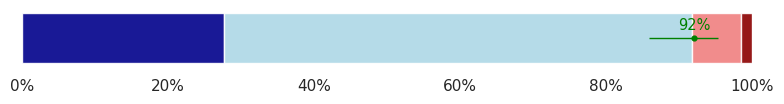

In [71]:
def plot_questao(df, questao, categorias, cores, valores_medios, intervalos_confianca):
    # Calcular a porcentagem de respostas para a questão
    porcentagem = df[questao].value_counts(normalize=True) * 100

    # Formatar o gráfico para uma questão
    plt.figure(figsize=(8, 1.2))
    bottom = 0

    # Retirar bordar
    sns.set(style="white", rc={"axes.spines.left": False, "axes.spines.right": False,
                           "axes.spines.bottom": False, "axes.spines.top": False})

    # Criar o gráfico de barras horizontal para a questão
    for categoria, cor in zip(categorias, cores):
      valor = porcentagem.get(categoria, 0)
      plt.barh([questao], [valor], color=cor, alpha=0.9, left=bottom, height=0.2)
      bottom += valor

    # Encontrar o índice da questão atual
    index_questao = questoes.index(questao)

    # Corrigir o índice para os valores e intervalos de confiança
    ponto_especifico = valores_medios[index_questao]
    intervalo_confianca_questao = intervalos_confianca[index_questao]

    plt.scatter(ponto_especifico, 0, color='green', zorder=5, s=12)
    plt.hlines(0, *intervalo_confianca_questao, colors='green', zorder=4, linewidth=1)

    # Adicionar rótulo em cima do ponto específico (valor médio)
    plt.text(ponto_especifico, 0.02, f'{ponto_especifico}%', ha='center', va='bottom', color='green', fontsize = 10.5)

    # Ajustar limites do eixo x para 0-100% e definir os ticks
    plt.xlim(0, 100)
    plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])

    # Remover ticks do eixo y desnecessários
    plt.yticks([])

    # Ajustar layout e exibir o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função para a questão Q8
plot_questao(df, 'Q8', categorias, cores, valores_medios, intervalos_confianca)

Obter os gráficos dos resultados das Meta-Questões em novo formato, incluindo o ponto com o valor da porcentagem que concorda segundo as previsões dos pesquisadores e linha do intervalo de confiança (95%):

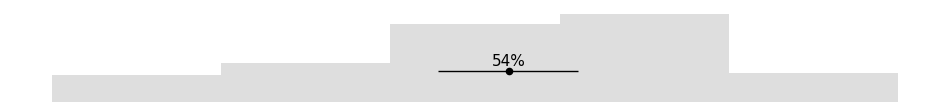

In [72]:
# Formatar o estilo do gráfico sem a grade de fundo
sns.set(style="white")

# Formatar o gráfico para 'MT_Q1' com uma altura menor para tornar o gráfico mais achatado
plt.figure(figsize=(12, 1.2))
ax = sns.histplot(df['MT_Q1'], bins=[0, 20, 40, 60, 80, 100], kde=False, stat="count", color='lightgray', edgecolor="none")

# Remover os rótulos e marcas dos eixos X e Y
ax.set_xlabel('')  # Remove o rótulo do eixo X
ax.set_ylabel('')  # Remove o rótulo do eixo Y
ax.set_xticklabels([])  # Remove os rótulos do eixo X
ax.yaxis.set_major_formatter(plt.NullFormatter())  # Remove as marcações do eixo Y

# Remover todas as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Encontrar a altura máxima das barras para posicionar o ponto no meio
max_height = max([p.get_height() for p in ax.patches])
mid_height = max_height / 2

# Ajustar para mover o ponto mais para baixo
adjusted_mid_height = mid_height * 0.7

# Resultado da suposição da porcentagem que concorda
point_x = 0.54 * 100

# Adicionar um ponto no valor especificado no eixo X, na metade da altura do eixo Y
plt.scatter([point_x], [adjusted_mid_height], color='black', s=20)  # s é o tamanho do ponto

# Adicionar o valor do ponto acima dele, formatado como porcentagem
plt.text(point_x, adjusted_mid_height + (adjusted_mid_height * 0.1), f'{0.54:.0%}', ha='center', va='bottom', color='black', fontsize=11)

# Intervalo de confiança
ci_lower, ci_upper = 0.4560 * 100, 0.6224 * 100

# Adicionar a linha horizontal para o intervalo de confiança
plt.hlines(y=adjusted_mid_height, xmin=ci_lower, xmax=ci_upper, color='black', linestyles='solid', lw=1)

# Exibir o gráfico
plt.show()

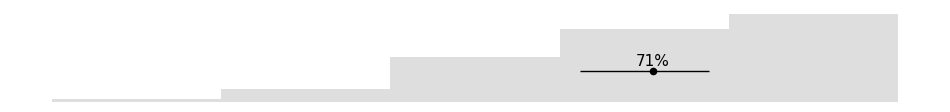

In [73]:
# Formatar do estilo do gráfico sem a grade de fundo
sns.set(style="white")

# Formatar o gráfico para 'MT_Q2' com uma altura menor para tornar o gráfico mais achatado
plt.figure(figsize=(12, 1.2))
ax = sns.histplot(df['MT_Q2'], bins=[0, 20, 40, 60, 80, 100], kde=False, stat="count", color='lightgray', edgecolor="none")

# Remover os rótulos e marcas dos eixos X e Y
ax.set_xlabel('')  # Remove o rótulo do eixo X
ax.set_ylabel('')  # Remove o rótulo do eixo Y
ax.set_xticklabels([])  # Remove os rótulos do eixo X
ax.yaxis.set_major_formatter(plt.NullFormatter())  # Remove as marcações do eixo Y

# Remover todas as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Encontrar a altura máxima das barras para posicionar o ponto no meio
max_height = max([p.get_height() for p in ax.patches])
mid_height = max_height / 2

# Ajustar para mover o ponto mais para baixo
adjusted_mid_height = mid_height * 0.7

# Resultado da suposição da porcentagem que concorda
point_x = 0.71 * 100

# Adicionar um ponto no valor especificado no eixo X, na metade da altura do eixo Y
plt.scatter([point_x], [adjusted_mid_height], color='black', s=20)  # s é o tamanho do ponto

# Adicionar o valor do ponto acima dele, formatado como porcentagem
plt.text(point_x, adjusted_mid_height + (adjusted_mid_height * 0.1), f'{0.71:.0%}', ha='center', va='bottom', color='black', fontsize=11)

# Intervalo de confiança
ci_lower, ci_upper = 0.6240 * 100, 0.7765 * 100

# Adicionar a linha horizontal para o intervalo de confiança
plt.hlines(y=adjusted_mid_height, xmin=ci_lower, xmax=ci_upper, color='black', linestyles='solid', lw=1)

# Exibir o gráfico
plt.show()

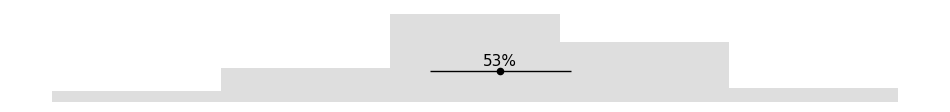

In [74]:
# Formatar o estilo do gráfico sem a grade de fundo
sns.set(style="white")

# Formatar o gráfico para 'MT_Q3' com uma altura menor para tornar o gráfico mais achatado
plt.figure(figsize=(12, 1.2))
ax = sns.histplot(df['MT_Q3'], bins=[0, 20, 40, 60, 80, 100], kde=False, stat="count", color='lightgray', edgecolor="none")

# Remover os rótulos e marcas dos eixos X e Y
ax.set_xlabel('')  # Remove o rótulo do eixo X
ax.set_ylabel('')  # Remove o rótulo do eixo Y
ax.set_xticklabels([])  # Remove os rótulos do eixo X
ax.yaxis.set_major_formatter(plt.NullFormatter())  # Remove as marcações do eixo Y

# Remover todas as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Encontrar a altura máxima das barras para posicionar o ponto no meio
max_height = max([p.get_height() for p in ax.patches])
mid_height = max_height / 2

# Ajustar para mover o ponto mais para baixo
adjusted_mid_height = mid_height * 0.7

# Resultado da suposição da porcentagem que concorda
point_x = 0.53 * 100

# Adicionar um ponto no valor especificado no eixo X, na metade da altura do eixo Y
plt.scatter([point_x], [adjusted_mid_height], color='black', s=20)  # s é o tamanho do ponto

# Adicionar o valor do ponto acima dele, formatado como porcentagem
plt.text(point_x, adjusted_mid_height + (adjusted_mid_height * 0.1), f'{0.53:.0%}', ha='center', va='bottom', color='black', fontsize=11)

# Intervalo de confiança
ci_lower, ci_upper = 0.4472 * 100, 0.6138 * 100

# Adicionar a linha horizontal para o intervalo de confiança
plt.hlines(y=adjusted_mid_height, xmin=ci_lower, xmax=ci_upper, color='black', linestyles='solid', lw=1)

# Exibir o gráfico
plt.show()

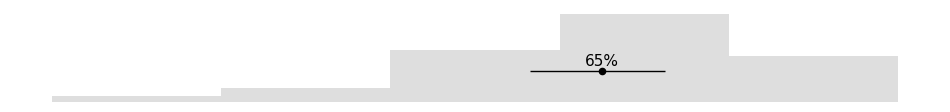

In [75]:
# Formatar o estilo do gráfico
sns.set(style="white")

# Formatar o gráfico para 'MT_Q4' com uma altura menor para tornar o gráfico mais achatado
plt.figure(figsize=(12, 1.2))
ax = sns.histplot(df['MT_Q4'], bins=[0, 20, 40, 60, 80, 100], kde=False, stat="count", color='lightgray', edgecolor="none")

# Remover os rótulos e marcas dos eixos X e Y
ax.set_xlabel('')  # Remove o rótulo do eixo X
ax.set_ylabel('')  # Remove o rótulo do eixo Y
ax.set_xticklabels([])  # Remove os rótulos do eixo X
ax.yaxis.set_major_formatter(plt.NullFormatter())  # Remove as marcações do eixo Y

# Remover todas as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Encontrar a altura máxima das barras para posicionar o ponto no meio
max_height = max([p.get_height() for p in ax.patches])
mid_height = max_height / 2

# Ajustar para mover o ponto mais para baixo
adjusted_mid_height = mid_height * 0.7

# Resultado da suposição da porcentagem que concorda
point_x = 0.65 * 100

# Adicionar um ponto no valor especificado no eixo X, na metade da altura do eixo Y
plt.scatter([point_x], [adjusted_mid_height], color='black', s=20)  # s é o tamanho do ponto

# Adicionar o valor do ponto acima dele, formatado como porcentagem
plt.text(point_x, adjusted_mid_height + (adjusted_mid_height * 0.1), f'{0.65:.0%}', ha='center', va='bottom', color='black', fontsize=11)

# Intervalo de confiança
ci_lower, ci_upper = 0.5653 * 100, 0.7249 * 100

# Adicionar a linha horizontal para o intervalo de confiança
plt.hlines(y=adjusted_mid_height, xmin=ci_lower, xmax=ci_upper, color='black', linestyles='solid', lw=1)

# Exibir o gráfico
plt.show()

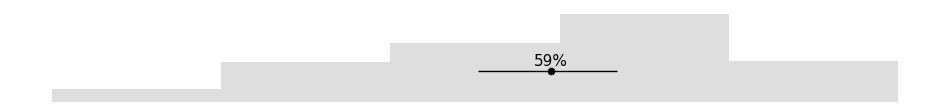

In [76]:
# Formatar o estilo do gráfico
sns.set(style="white")

# Formatar o gráfico para 'MT_Q5' com uma altura menor para tornar o gráfico mais achatado
plt.figure(figsize=(12, 1.2))
ax = sns.histplot(df['MT_Q5'], bins=[0, 20, 40, 60, 80, 100], kde=False, stat="count", color='lightgray', edgecolor="none")

# Remover os rótulos e marcas dos eixos X e Y
ax.set_xlabel('')  # Remove o rótulo do eixo X
ax.set_ylabel('')  # Remove o rótulo do eixo Y
ax.set_xticklabels([])  # Remove os rótulos do eixo X
ax.yaxis.set_major_formatter(plt.NullFormatter())  # Remove as marcações do eixo Y

# Remover todas as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Encontrar a altura máxima das barras para posicionar o ponto no meio
max_height = max([p.get_height() for p in ax.patches])
mid_height = max_height / 2

# Ajustar para mover o ponto mais para baixo
adjusted_mid_height = mid_height * 0.7

# Resultado da suposição da porcentagem que concorda
point_x = 0.59 * 100

# Adicionar um ponto no valor especificado no eixo X, na metade da altura do eixo Y
plt.scatter([point_x], [adjusted_mid_height], color='black', s=20)  # s é o tamanho do ponto

# Adicionar o valor do ponto acima dele, formatado como porcentagem
plt.text(point_x, adjusted_mid_height + (adjusted_mid_height * 0.1), f'{0.59:.0%}', ha='center', va='bottom', color='black', fontsize=11)

# Intervalo de confiança
ci_lower, ci_upper = 0.5034 * 100, 0.6678 * 100

# Adicionar a linha horizontal para o intervalo de confiança
plt.hlines(y=adjusted_mid_height, xmin=ci_lower, xmax=ci_upper, color='black', linestyles='solid', lw=1)

# Exibir o gráfico
plt.show()

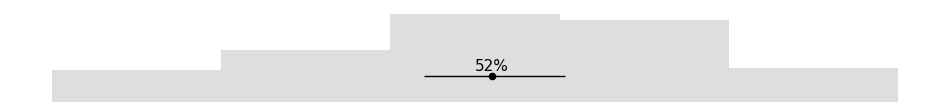

In [77]:
# Formatar o estilo do gráfico
sns.set(style="white")

# Formatar o gráfico para 'MT_Q6' com uma altura menor para tornar o gráfico mais achatado
plt.figure(figsize=(12, 1.2))
ax = sns.histplot(df['MT_Q6'], bins=[0, 20, 40, 60, 80, 100], kde=False, stat="count", color='lightgray', edgecolor="none")

# Remover os rótulos e marcas dos eixos X e Y
ax.set_xlabel('')  # Remove o rótulo do eixo X
ax.set_ylabel('')  # Remove o rótulo do eixo Y
ax.set_xticklabels([])  # Remove os rótulos do eixo X
ax.yaxis.set_major_formatter(plt.NullFormatter())  # Remove as marcações do eixo Y

# Remover todas as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Encontrar a altura máxima das barras para posicionar o ponto no meio
max_height = max([p.get_height() for p in ax.patches])
mid_height = max_height / 2

# Ajustar para mover o ponto mais para baixo
adjusted_mid_height = adjusted_mid_height * 0.7

# Resultado da suposição da porcentagem que concorda
point_x = 0.52 * 100

# Adiciona um ponto no valor especificado no eixo X, na metade da altura do eixo Y
plt.scatter([point_x], [adjusted_mid_height], color='black', s=20)  # s é o tamanho do ponto

# Adicionar o valor do ponto acima dele, formatado como porcentagem e em verde
plt.text(point_x, adjusted_mid_height + (adjusted_mid_height * 0.1), f'{0.52:.0%}', ha='center', va='bottom', color='black', fontsize=11)

# Intervalo de confiança
ci_lower, ci_upper = 0.4398 * 100, 0.6066 * 100

# Adicionar a linha horizontal para o intervalo de confiança, não tracejada e em verde
plt.hlines(y=adjusted_mid_height, xmin=ci_lower, xmax=ci_upper, color='black', linestyles='solid', lw=1)

# Exibir o gráfico
plt.show()

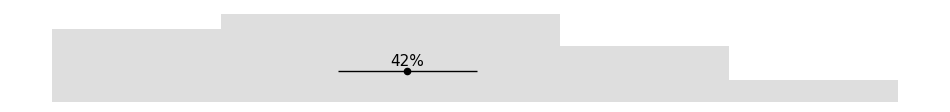

In [78]:
# Formatar do estilo do gráfico
sns.set(style="white")

# Formatar o gráfico para 'MT_Q7' com uma altura menor para tornar o gráfico mais achatado
plt.figure(figsize=(12, 1.2))
ax = sns.histplot(df['MT_Q7'], bins=[0, 20, 40, 60, 80, 100], kde=False, stat="count", color='lightgray', edgecolor="none")

# Remover os rótulos e marcas dos eixos X e Y
ax.set_xlabel('')  # Remove o rótulo do eixo X
ax.set_ylabel('')  # Remove o rótulo do eixo Y
ax.set_xticklabels([])  # Remove os rótulos do eixo X
ax.yaxis.set_major_formatter(plt.NullFormatter())  # Remove as marcações do eixo Y

# Remover todas as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Encontrar a altura máxima das barras para posicionar o ponto no meio
max_height = max([p.get_height() for p in ax.patches])
mid_height = max_height / 2

# Ajustar para mover o ponto mais para baixo
adjusted_mid_height = mid_height * 0.7

# Resultado da suposição da porcentagem que concorda
point_x = 0.42 * 100

# Adicionar um ponto no valor especificado no eixo X, na metade da altura do eixo Y
plt.scatter([point_x], [adjusted_mid_height], color='black', s=20)  # s é o tamanho do ponto

# Adicionar o valor do ponto acima dele, formatado como porcentagem
plt.text(point_x, adjusted_mid_height + (adjusted_mid_height * 0.1), f'{0.42:.0%}', ha='center', va='bottom', color='black', fontsize=11)

# Intervalo de confiança
ci_lower, ci_upper = 0.3378 * 100, 0.5026 * 100

# Adicionar a linha horizontal para o intervalo de confiança
plt.hlines(y=adjusted_mid_height, xmin=ci_lower, xmax=ci_upper, color='black', linestyles='solid', lw=1)

# Exibir o gráfico
plt.show()

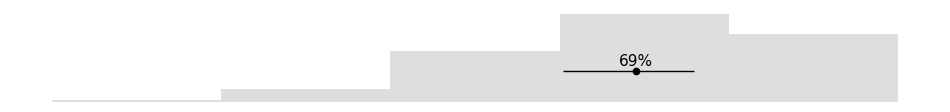

In [79]:
# Formatar do estilo do gráfico
sns.set(style="white")

# Formatar o gráfico para 'MT_Q8' com uma altura menor para tornar o gráfico mais achatado
plt.figure(figsize=(12, 1.2))
ax = sns.histplot(df['MT_Q8'], bins=[0, 20, 40, 60, 80, 100], kde=False, stat="count", color='lightgray', edgecolor="none")

# Remover os rótulos e marcas dos eixos X e Y
ax.set_xlabel('')  # Remove o rótulo do eixo X
ax.set_ylabel('')  # Remove o rótulo do eixo Y
ax.set_xticklabels([])  # Remove os rótulos do eixo X
ax.yaxis.set_major_formatter(plt.NullFormatter())  # Remove as marcações do eixo Y

# Remover todas as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Encontrar a altura máxima das barras para posicionar o ponto no meio
max_height = max([p.get_height() for p in ax.patches])
mid_height = max_height / 2

# Ajustar para mover o ponto mais para baixo
adjusted_mid_height = mid_height * 0.7

# Resultado da suposição da porcentagem que concorda
point_x = 0.69 * 100

# Adicionar um ponto no valor especificado no eixo X, na metade da altura do eixo Y
plt.scatter([point_x], [adjusted_mid_height], color='black', s=20)  # s é o tamanho do ponto

# Adicionar o valor do ponto acima dele, formatado como porcentagem
plt.text(point_x, adjusted_mid_height + (adjusted_mid_height * 0.1), f'{0.69:.0%}', ha='center', va='bottom', color='black', fontsize=11)

# Intervalo de confiança
ci_lower, ci_upper = 0.6038 * 100, 0.7590 * 100

# Adicionar a linha horizontal para o intervalo de confiança
plt.hlines(y=adjusted_mid_height, xmin=ci_lower, xmax=ci_upper, color='black', linestyles='solid', lw=1)

# Exibir o gráfico
plt.show()

# Correlação de Spearman dos posicionamentos

Correçao de Spearman para os pares de Questões

In [80]:
mapeamento_respostas = {
    "Concordo totalmente": 2,
    "Concordo mais do que discordo": 1,
    "Discordo mais do que concordo": -1,
    "Discordo totalmente": -2
}

# Mapear as respostas em todo o DataFrame para as questões
questoes = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']
for questao in questoes:
    df[questao] = df[questao].map(mapeamento_respostas)

In [81]:
# Transformas as variáveis das questões em representações numéricas

encoder = LabelEncoder()
df['Q1'] = encoder.fit_transform(df['Q1'])
df['Q2'] = encoder.fit_transform(df['Q2'])
df['Q3'] = encoder.fit_transform(df['Q3'])
df['Q4'] = encoder.fit_transform(df['Q4'])
df['Q5'] = encoder.fit_transform(df['Q5'])
df['Q6'] = encoder.fit_transform(df['Q6'])
df['Q7'] = encoder.fit_transform(df['Q7'])
df['Q8'] = encoder.fit_transform(df['Q8'])

In [82]:
# Novo dataframe

df2 = pd.DataFrame(columns=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'], data=df)

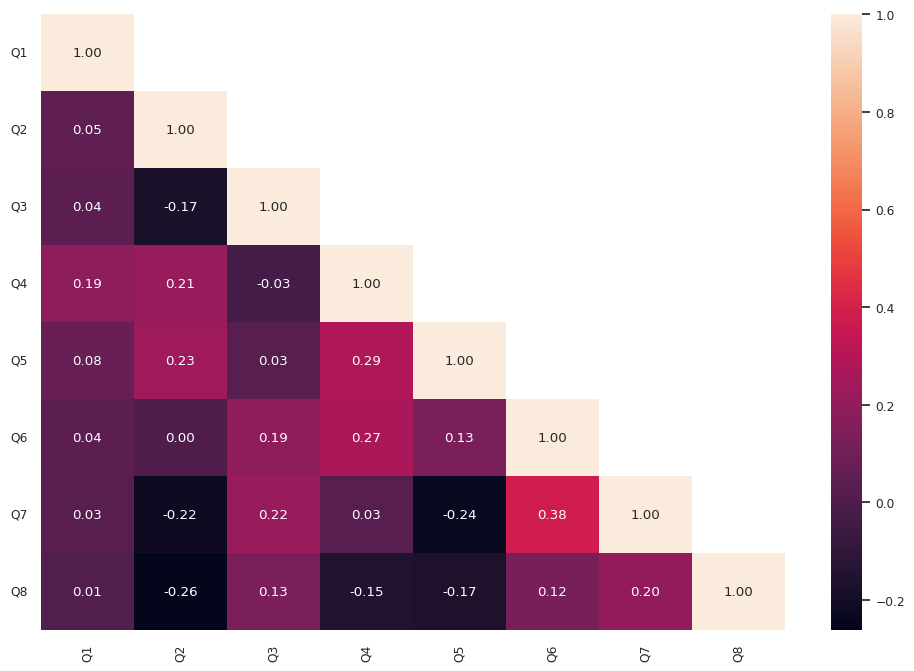

In [83]:
corr = df2.corr()
sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 1.5})
plt.figure(figsize=(12,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

In [84]:
# Calcular a correlação de Spearman para cada par de variáveis
resultados = []
for col1 in df2.columns:
    for col2 in df2.columns:
        if col1 != col2:
            correlacao, p_valor = spearmanr(df2[col1], df2[col2], nan_policy='omit')
            if abs(correlacao) > 0.11 and p_valor < 0.05:
                resultados.append((col1, col2, correlacao, p_valor))

# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados, columns=['Questão A', 'Questão B', 'Correlação', 'p-valor'])

# Remover duplicatas: criar uma coluna temporária para pares de variáveis, remover duplicatas, e depois descartar a coluna
df_resultados['VarPair'] = df_resultados.apply(lambda x: frozenset([x['Questão A'], x['Questão B']]), axis=1)
df_resultados = df_resultados.drop_duplicates(subset=['VarPair']).drop('VarPair', axis=1)

# Aplicar o valor absoluto apenas à coluna de correlação
df_resultados['AbsCorrelation'] = df_resultados['Correlação'].abs()

# Ordenar os resultados pelo valor absoluto da correlação, de forma decrescente
df_resultados_sorted = df_resultados.sort_values(by='AbsCorrelation', ascending=False).head(20)

# Selecionar as top 20 correlações, mantendo as colunas originais
df_top20 = df_resultados_sorted[['Questão A', 'Questão B', 'Correlação', 'p-valor']]

# Mostrar as top 20 correlações de Spearman estatisticamente significativas (p < 0.05)
print(df_top20)

   Questão A Questão B  Correlação   p-valor
9         Q6        Q7    0.368527  0.000012
4         Q4        Q5    0.273648  0.001377
1         Q2        Q8   -0.262682  0.002167
5         Q4        Q6    0.255089  0.002934
0         Q2        Q7   -0.204740  0.017643
3         Q3        Q7    0.199948  0.020540
2         Q3        Q6    0.197429  0.022222
13        Q7        Q8    0.180276  0.037124


In [85]:
questoes_texto = {
    'Q1': '1. Existem até o momento mais dissensos do que consensos sobre quais são os principais problemas a serem enfrentados pelo campo da IA.',
    'Q2': '2. As Big Techs têm mais poder do que deveriam em definir as possibilidades e limites do campo da IA.',
    'Q3': '3. O foco atual do campo da IA na abordagem data and compute-intensive é acertado.',
    'Q4': '4. No contexto da pesquisa em IA, considerações éticas e progresso científico podem entrar em conflito.',
    'Q5': '5. Outros setores não-especialistas, como o poder público e a sociedade civil, devem ter participação nas definições éticas do campo da IA.',
    'Q6': '6. A evolução dos Large language models (LLMs) está indo em direção à AGI.',
    'Q7': '7. Os pesquisadores no campo da IA devem ter como prioridade perseguir a chamada Inteligência Artificial Geral, em inglês Artificial General Intelligence (AGI).',
    'Q8': '8. De modo geral, o desenvolvimento científico da IA terá um impacto futuro positivo no mundo.'
}

# Calcular a correlação de Spearman para cada par de variáveis
resultados = []
for col1 in df2.columns:
    for col2 in df2.columns:
        if col1 != col2:
            correlacao, p_valor = spearmanr(df2[col1], df2[col2], nan_policy='omit')
            if abs(correlacao) > 0.11 and p_valor < 0.05:
                resultados.append((col1, col2, correlacao, p_valor))

# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados, columns=['Questão A', 'Questão B', 'Correlação', 'p-valor'])

# Remover duplicatas: criar uma coluna temporária para pares de variáveis, remover duplicatas, e depois descartar a coluna
df_resultados['VarPair'] = df_resultados.apply(lambda x: frozenset([x['Questão A'], x['Questão B']]), axis=1)
df_resultados = df_resultados.drop_duplicates(subset=['VarPair']).drop('VarPair', axis=1)

# Aplicar o valor absoluto apenas à coluna de correlação
df_resultados['AbsCorrelation'] = df_resultados['Correlação'].abs()

# Ordenar os resultados pelo valor absoluto da correlação, de forma decrescente
df_resultados_sorted = df_resultados.sort_values(by='AbsCorrelation', ascending=False).head(20)

# Substituir os identificadores das questões pelos textos das questões
df_resultados_sorted['Questão A'] = df_resultados_sorted['Questão A'].map(questoes_texto)
df_resultados_sorted['Questão B'] = df_resultados_sorted['Questão B'].map(questoes_texto)

# Selecionar as top 20 correlações, mantendo as colunas originais
df_top20 = df_resultados_sorted[['Questão A', 'Questão B', 'Correlação', 'p-valor']]

# Mostrar as top 20 correlações de Spearman estatisticamente significativas (p < 0.05)
df_top20

,Questão A,Questão B,Correlação,p-valor
9,6. A evolução dos Large language models (LLMs)...,7. Os pesquisadores no campo da IA devem ter c...,0.368527,0.000012
4,"4. No contexto da pesquisa em IA, consideraçõe...","5. Outros setores não-especialistas, como o po...",0.273648,0.001377
1,2. As Big Techs têm mais poder do que deveriam...,"8. De modo geral, o desenvolvimento científico...",-0.262682,0.002167
5,"4. No contexto da pesquisa em IA, consideraçõe...",6. A evolução dos Large language models (LLMs)...,0.255089,0.002934
0,2. As Big Techs têm mais poder do que deveriam...,7. Os pesquisadores no campo da IA devem ter c...,-0.204740,0.017643
3,3. O foco atual do campo da IA na abordagem da...,7. Os pesquisadores no campo da IA devem ter c...,0.199948,0.020540
2,3. O foco atual do campo da IA na abordagem da...,6. A evolução dos Large language models (LLMs)...,0.197429,0.022222
13,7. Os pesquisadores no campo da IA devem ter c...,"8. De modo geral, o desenvolvimento científico...",0.180276,0.037124


In [86]:
# Inserir legenda de cores
def color_correlation(val):
    color = 'red' if val < 0 else 'green'
    return f'color: {color}'

# Ajustar quebras de linha
def wrap_text(val):
    return 'white-space: normal; word-wrap: break-word; max-width: 350px;'

# Aplicar estilos múltiplos
def style_dataframe(df):
    return df.style.applymap(color_correlation, subset=['Correlação']).applymap(wrap_text)

# Usar a função style_dataframe para aplicar o estilo
df_top20_styled = style_dataframe(df_top20)
df_top20_styled

/tmp/ipython-input-86-3125065499.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return df.style.applymap(color_correlation, subset=['Correlação']).applymap(wrap_text)


,Questão A,Questão B,Correlação,p-valor
9,6. A evolução dos Large language models (LLMs) está indo em direção à AGI.,"7. Os pesquisadores no campo da IA devem ter como prioridade perseguir a chamada Inteligência Artificial Geral, em inglês Artificial General Intelligence (AGI).",0.368527,0.000012
4,"4. No contexto da pesquisa em IA, considerações éticas e progresso científico podem entrar em conflito.","5. Outros setores não-especialistas, como o poder público e a sociedade civil, devem ter participação nas definições éticas do campo da IA.",0.273648,0.001377
1,2. As Big Techs têm mais poder do que deveriam em definir as possibilidades e limites do campo da IA.,"8. De modo geral, o desenvolvimento científico da IA terá um impacto futuro positivo no mundo.",-0.262682,0.002167
5,"4. No contexto da pesquisa em IA, considerações éticas e progresso científico podem entrar em conflito.",6. A evolução dos Large language models (LLMs) está indo em direção à AGI.,0.255089,0.002934
0,2. As Big Techs têm mais poder do que deveriam em definir as possibilidades e limites do campo da IA.,"7. Os pesquisadores no campo da IA devem ter como prioridade perseguir a chamada Inteligência Artificial Geral, em inglês Artificial General Intelligence (AGI).",-0.204740,0.017643
3,3. O foco atual do campo da IA na abordagem data and compute-intensive é acertado.,"7. Os pesquisadores no campo da IA devem ter como prioridade perseguir a chamada Inteligência Artificial Geral, em inglês Artificial General Intelligence (AGI).",0.199948,0.020540
2,3. O foco atual do campo da IA na abordagem data and compute-intensive é acertado.,6. A evolução dos Large language models (LLMs) está indo em direção à AGI.,0.197429,0.022222
13,"7. Os pesquisadores no campo da IA devem ter como prioridade perseguir a chamada Inteligência Artificial Geral, em inglês Artificial General Intelligence (AGI).","8. De modo geral, o desenvolvimento científico da IA terá um impacto futuro positivo no mundo.",0.180276,0.037124
